## Mount Google Drive (Colab)

This cell mounts Google Drive to access and save files directly from Colab.

After mounting, files can be read from or saved to:
`/content/drive/MyDrive/`


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -q "/content/drive/MyDrive/ESG.zip" -d "/content/ESG"

## Inspect Top-Level Dataset Folders

This cell lists all folders inside the main ESG directory.

**Purpose**
- Verify dataset structure
- Confirm that expected sections (Environment, Social, Governance) exist
- Ensure correct root path before loading files


In [4]:
import os

root = "/content/ESG/ESG"

print("Top-level folders:")
for folder in os.listdir(root):
    print(" -", folder)

Top-level folders:
 - Social
 - .DS_Store
 - Governance
 - Environment


## Inspect Dataset Structure (ESG Sections)

This cell checks the folder structure for each ESG section:

- Iterates over: **Environment, Social, Governance**
- Counts number of files in each `Data` folder
- Prints first few filenames for verification

**Purpose:**  
Quick sanity check to confirm data is correctly organized and accessible before loading.


In [5]:
for section in ["Environment", "Social", "Governance"]:
    section_path = os.path.join(root, section)
    data_path = os.path.join(section_path, "Data")
    print("\nSECTION:", section)
    print("Files found:", len(os.listdir(data_path)))
    print("First 10 files:", sorted(os.listdir(data_path))[:10])


SECTION: Environment
Files found: 81
First 10 files: ['.DS_Store', 'c_000.pkl.xz', 'c_001.pkl.xz', 'c_002.pkl.xz', 'c_003.pkl.xz', 'c_004.pkl.xz', 'c_005.pkl.xz', 'c_006.pkl.xz', 'c_007.pkl.xz', 'c_008.pkl.xz']

SECTION: Social
Files found: 150
First 10 files: ['.DS_Store', 'c_000.pkl.xz', 'c_001.pkl.xz', 'c_002.pkl.xz', 'c_003.pkl.xz', 'c_004.pkl.xz', 'c_005.pkl.xz', 'c_006.pkl.xz', 'c_007.pkl.xz', 'c_008.pkl.xz']

SECTION: Governance
Files found: 99
First 10 files: ['.DS_Store', 'c_000.pkl.xz', 'c_001.pkl.xz', 'c_002.pkl.xz', 'c_003.pkl.xz', 'c_004.pkl.xz', 'c_005.pkl.xz', 'c_006.pkl.xz', 'c_007.pkl.xz', 'c_008.pkl.xz']


## Load Compressed Pickle Files (.xz)

This helper function loads `.xz` compressed pickle files using `lzma`.

- Opens file in binary mode
- Attempts to unpickle the object
- Prints an error message if loading fails

**Purpose:**  
Safely load compressed dataset files while handling corrupted or incompatible files gracefully.


In [6]:
import pickle, lzma

def load_xz_pickle(path):
    try:
        with lzma.open(path, "rb") as f:
            return pickle.load(f)
    except Exception as e:
        print("❌ Error loading:", path)
        print("Error:", e)
        return None

## Load and Preview ESG Dataset (Compressed)

This cell loads one `.pkl.xz` dataset file from the selected ESG section (e.g., Environment).

**Steps**
- Filter only valid dataset files (`.pkl.xz`)
- Select a sample file
- Load it using `load_xz_pickle()`
- Print object type and preview contents

**Purpose**
- Verify file integrity
- Inspect dataset structure before full processing
- Confirm correct loading format (e.g., DataFrame, dict, list)


In [8]:
section = "Environment"   # or Social / Governance
data_path = os.path.join(root, section, "Data")

# Only pick real dataset files
files = sorted([f for f in os.listdir(data_path) if f.endswith(".pkl.xz")])

print("Total dataset files:", len(files))
print("First 5 files:", files[:5])

sample_file = os.path.join(data_path, files[0])
print("Loading:", sample_file)

environment = load_xz_pickle(sample_file)

print("\nLoaded object type:", type(environment))

preview = str(environment)
print("\nPreview (first 1000 chars):")
print(preview[:1000])

Total dataset files: 80
First 5 files: ['c_000.pkl.xz', 'c_001.pkl.xz', 'c_002.pkl.xz', 'c_003.pkl.xz', 'c_004.pkl.xz']
Loading: /content/ESG/ESG/Environment/Data/c_000.pkl.xz


/tmp/ipython-input-344285837.py:6: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  return pickle.load(f)



Loaded object type: <class 'pandas.core.frame.DataFrame'>

Preview (first 1000 chars):
                                                  title publication_date  \
0     3 Alternative Energy Funds Set to Gain From Im...       2020-12-07   
1     Secretary-General welcomes US return to Paris ...       2021-01-21   
2         OpEd: Beyond Biden: Climate Investing in 2021       2021-01-19   
3     Why Indian companies will need to adopt ESG pa...       2020-12-09   
4     Secretary-General welcomes US return to Paris ...       2021-01-22   
...                                                 ...              ...   
2220       The Taxi Service That Plants Trees As You Go       2020-03-12   
2221  HIGH SPEED TWO (HS2) LIMITED - THE LATEST INDU...       2024-03-26   
2222  An unbridled thirst for power or material pros...       2015-09-27   
2223                           Breakfast - 06:06 AM GMT       2013-06-23   
2224  US FTC sues Volkswagen over diesel advertising...       2016-03-29   


## Sample Data — Environment ESG Theme


In [9]:
environment.head(5)

,title,publication_date,byline,content,subject,country,city,person,industry,company,word_count,publication_date_text,publication,author,copyright
0,3 Alternative Energy Funds Set to Gain From Im...,2020-12-07,Zacks Equity Research,3 Alternative Energy Funds Set to Gain From Im...,"['ENERGY & ENVIRONMENT', 'FINANCIAL MARKET UPD...","['UNITED STATES', 'EUROPE']",[],['JOE BIDEN'],"['SIC6282 INVESTMENT ADVICE', 'NAICS523920 POR...","['ZACKS INVESTMENT RESEARCH INC', 'INVESCO LTD...",1464,"December 7, 2020 Monday","['Newstex Blogs', 'Zacks Investment Research']",Zacks Equity Research,Copyright 2020 Newstex LLC All Rights Reserved
1,Secretary-General welcomes US return to Paris ...,2021-01-21,,Secretary-General welcomes US return to Paris ...,"['CLIMATE CHANGE REGULATION & POLICY', 'AGREEM...",['UNITED STATES'],"['GLASGOW, SCOTLAND']","['JOE BIDEN', 'BARACK OBAMA', 'DONALD TRUMP', ...","['EMISSIONS', 'CARBON NEUTRAL INITIATIVES', 'G...",[],482,"January 21, 2021 Thursday",['M2 PressWIRE'],,Copyright 2021 Normans Media Limited All Right...
2,OpEd: Beyond Biden: Climate Investing in 2021,2021-01-19,NinetyOne,OpEd: Beyond Biden: Climate Investing in 2021 ...,"['2021 US PRESIDENTIAL INAUGURATION', ""BIDEN'S...",['UNITED STATES'],[],"['DONALD TRUMP', 'JOE BIDEN', 'XI JINPING']","['ALTERNATIVE & RENEWABLE ENERGY', 'AUTOMOTIVE...",[],1202,"January 19, 2021 Tuesday","['Newstex Blogs', '3BL Blogs']",NinetyOne,Copyright 2021 Newstex LLC All Rights Reserved
3,Why Indian companies will need to adopt ESG pa...,2020-12-09,,Why Indian companies will need to adopt ESG pa...,"['ESG FACTORS', 'ETHICAL INVESTING', 'SUSTAINA...","['INDIA', 'UNITED STATES', 'CANADA', 'EUROPE',...","['NEW DELHI, INDIA']",['JOE BIDEN'],"['ETHICAL INVESTING', 'SUSTAINABLE INVESTING',...",[],595,"December 9, 2020 Wednesday",['Business Line'],,Copyright 2020 Business Line All Rights Reserved
4,Secretary-General welcomes US return to Paris ...,2021-01-22,,Secretary-General welcomes US return to Paris ...,"['CLIMATE CHANGE REGULATION & POLICY', 'AGREEM...",['UNITED STATES'],"['GLASGOW, SCOTLAND']","['JOE BIDEN', 'BARACK OBAMA', 'DONALD TRUMP', ...","['EMISSIONS', 'CARBON NEUTRAL INITIATIVES', 'G...",[],507,"January 22, 2021 Friday",['Impact News Service'],,Copyright 2021 Impact Media Limited All Rights...


In [10]:
environment.columns

Index(['title', 'publication_date', 'byline', 'content', 'subject', 'country',
       'city', 'person', 'industry', 'company', 'word_count',
       'publication_date_text', 'publication', 'author', 'copyright'],
      dtype='object')

## Load and Preview Social Dataset

This cell loads a sample `.pkl.xz` file from the **Social** section.

**Process**
- Filter valid dataset files
- Load one sample file
- Display object type
- Show a short preview of the content

**Purpose**
- Confirm successful loading
- Inspect data structure before merging or preprocessing


In [11]:
section = "Social"   # or Social / Governance
data_path = os.path.join(root, section, "Data")

# Only pick real dataset files
files = sorted([f for f in os.listdir(data_path) if f.endswith(".pkl.xz")])

print("Total dataset files:", len(files))
print("First 5 files:", files[:5])

sample_file = os.path.join(data_path, files[0])
print("Loading:", sample_file)

social = load_xz_pickle(sample_file)

print("\nLoaded object type:", type(social))

preview = str(social)
print("\nPreview (first 1000 chars):")
print(preview[:1000])

Total dataset files: 149
First 5 files: ['c_000.pkl.xz', 'c_001.pkl.xz', 'c_002.pkl.xz', 'c_003.pkl.xz', 'c_004.pkl.xz']
Loading: /content/ESG/ESG/Social/Data/c_000.pkl.xz


/tmp/ipython-input-344285837.py:6: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  return pickle.load(f)



Loaded object type: <class 'pandas.core.frame.DataFrame'>

Preview (first 1000 chars):
                                                  title publication_date  \
0     'TraderMoni' Will Unlock Potential Of Informal...       2018-09-13   
1                         All In for September 17, 2021       2021-09-17   
2     Dear Mr. President: 10 letters of advice for B...       2021-01-20   
3     Provision to Develop a Sustainable COVID Recov...       2021-11-15   
4     We're not drifting into segregation, we're hur...       2021-05-30   
...                                                 ...              ...   
2820  OneLogin Appoints Joanne Bradford to Board of ...       2019-07-01   
2821  The first year of the Lula government under an...       2023-12-22   
2822  Microsoft Co. (NASDAQ:MSFT) Stake Raised by Va...       2020-11-24   
2823  Virtual Annual Meetings of shareholders and vo...       2020-03-26   
2824  Kwara Decides 2023: Alleged Suspicious Money T...       2023-03-09   


## Sample Data — Social ESG Theme


In [13]:
social.head(5)

,title,publication_date,byline,content,subject,country,city,person,industry,company,word_count,publication_date_text,publication,author,copyright
0,'TraderMoni' Will Unlock Potential Of Informal...,2018-09-13,Kunle Ajayi,'TraderMoni' Will Unlock Potential Of Informal...,"['ENTREPRENEURSHIP', 'GOVERNMENT & PUBLIC ADMI...",['NIGERIA'],"['LAGOS, NIGERIA']","['MUHAMMADU BUHARI', 'YEMI OSINBAJO']","['MICROFINANCE', 'MOBILE DEVICES']",[],440,"September 13, 2018 Thursday",['Daily Independent (Nigeria)'],Kunle Ajayi,Copyright 2018 Daily Independent. Provided by ...
1,"All In for September 17, 2021",2021-09-17,"Chris Hayes, Brandy Zadrozny","All In for September 17, 2021 Chris Hayes, Bra...","['VACCINES', 'ADDICTION', 'EXECUTIVES', 'LEGIS...","['UNITED STATES', 'AFGHANISTAN']","['KABUL, AFGHANISTAN']","['ANTHONY FAUCI', 'ANTHONY GONZALEZ', 'DEBORAH...","['NAICS312230 TOBACCO MANUFACTURING', 'SIC2111...","['LORILLARD LLC', 'U S TOBACCO CO']",7851,"September 17, 2021 Friday",['MSNBC'],"Chris Hayes, Brandy Zadrozny","Copyright 2021 ASC Services II Media, LLCAll ..."
2,Dear Mr. President: 10 letters of advice for B...,2021-01-20,Monitor contributors,Dear Mr. President: 10 letters of advice for B...,"[""BIDEN'S FIRST 100 DAYS"", 'DEMOCRACIES', 'NEG...",['UNITED STATES'],[],"['JOE BIDEN', 'BARACK OBAMA']",['PUBLISHING'],[],4661,"January 20, 2021 Wednesday",['The Christian Science Monitor'],Monitor contributors,Copyright 2021 Christian Science Publishing So...
3,Provision to Develop a Sustainable COVID Recov...,2021-11-15,,Provision to Develop a Sustainable COVID Recov...,"['UNITED NATIONS', 'COVID CORONAVIRUS', 'GREEN...","['MALAYSIA', 'ASIA']",[],[],"['GREEN FINANCE', 'SUSTAINABLE DEVELOPMENT', '...",[],432,"November 15, 2021 Monday",['Tenders Monitor Africa-Asia'],,Copyright 2021 Al Bawaba. Provided by Syndigat...
4,"We're not drifting into segregation, we're hur...",2021-05-30,By Nick Timothy,"We're not drifting into segregation, we're hur...","['RACE & ETHNICITY', 'MINORITY GROUPS', 'NEGAT...","['UNITED KINGDOM', 'ENGLAND', 'ISRAEL', 'STATE...","['LEICESTER, ENGLAND', 'LONDON, ENGLAND']",[],"['MEDIA & TELECOMMUNICATIONS', 'WRITERS']",[],1031,"May 30, 2021 Sunday",['telegraph.co.uk'],By Nick Timothy,Copyright 2021 Telegraph Media Group Limited A...


## Load and Preview Governance Dataset

This cell loads a sample `.pkl.xz` file from the **Governance** section.

**Steps**
- Identify valid dataset files
- Load one example file
- Print object type
- Display a short content preview

**Purpose**
- Ensure correct file access
- Validate dataset structure before further processing


In [15]:
section = "Governance"   # or Social / Governance
data_path = os.path.join(root, section, "Data")

# Only pick real dataset files
files = sorted([f for f in os.listdir(data_path) if f.endswith(".pkl.xz")])

print("Total dataset files:", len(files))
print("First 5 files:", files[:5])

sample_file = os.path.join(data_path, files[0])
print("Loading:", sample_file)

governance = load_xz_pickle(sample_file)

print("\nLoaded object type:", type(governance))

preview = str(governance)
print("\nPreview (first 1000 chars):")
print(preview[:1000])


Total dataset files: 98
First 5 files: ['c_000.pkl.xz', 'c_001.pkl.xz', 'c_002.pkl.xz', 'c_003.pkl.xz', 'c_004.pkl.xz']
Loading: /content/ESG/ESG/Governance/Data/c_000.pkl.xz


/tmp/ipython-input-344285837.py:6: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  return pickle.load(f)



Loaded object type: <class 'pandas.core.frame.DataFrame'>

Preview (first 1000 chars):
                                                  title publication_date  \
0     One Man Just Sent The $30 Trillion ESG Revolut...       2021-07-19   
1     Climate Change Is Affecting Agrarian Migrant L...       2021-03-15   
2     Kamala Harris announces she will FINALLY addre...       2021-04-14   
3     "Boys & Sex" author: If you can't say no, I do...       2020-01-14   
4                 Burma top peace negotiator touring UK       2013-04-21   
...                                                 ...              ...   
1670  Investing in the future; City should rethink p...       2021-07-11   
1671  Why GOP declared war on wokeness; Corporate is...       2023-01-06   
1672  NATIONAL LGBTQ TASK FORCE JOINS OVER 350 LGBTQ...       2020-06-17   
1673           Populism – The Orphan Child of Democracy       2020-09-29   
1674     Put your money where your anti-racist mouth is       2020-09-17   


## Sample Data — Governance ESG Theme


In [16]:
governance.head(5)

,title,publication_date,byline,content,subject,country,city,person,industry,company,word_count,publication_date_text,publication,author,copyright
0,One Man Just Sent The $30 Trillion ESG Revolut...,2021-07-19,,One Man Just Sent The $30 Trillion ESG Revolut...,"['BUSINESS NEWS', 'CLIMATE CHANGE', 'ESG FACTO...",['UNITED STATES'],[],['JOE BIDEN'],"['NAICS523920 PORTFOLIO MANAGEMENT', 'NAICS523...","['BLACKROCK INC', 'ENPHASE ENERGY INC', 'NEXTE...",3114,"July 19, 2021 Monday",['MENAFN - Business & Finance News (English)'],,Copyright 2021 MENAFN.COM All Rights Reserved
1,Climate Change Is Affecting Agrarian Migrant L...,2021-03-15,Jemima Nomunume Baada,Climate Change Is Affecting Agrarian Migrant L...,"['ACCESS TO WATER', 'CLIMATE CHANGE', 'COVID C...","['AFRICA', 'GHANA']",[],[],['FARMERS & RANCHERS'],[],1121,"March 15, 2021",['The Conversation Africa'],Jemima Nomunume Baada,Copyright 2021 The Conversation Africa Distrib...
2,Kamala Harris announces she will FINALLY addre...,2021-04-14,"Katelyn Caralle, U.S. Political Reporter For D...","But what about the border, Kamala? VP finally ...","['MIGRATION ISSUES', 'NEGATIVE NEWS', 'TALKS &...",['GUATEMALA'],[],"['KAMALA HARRIS', 'JOE BIDEN', 'ALEJANDRO MAYO...",['VIDEO CONFERENCING'],[],3748,"April 14, 2021 Wednesday",['MailOnline'],"Katelyn Caralle, U.S. Political Reporter For D...",Copyright 2021 Associated Newspapers Ltd. All ...
3,"""Boys & Sex"" author: If you can't say no, I do...",2020-01-14,,"""Boys & Sex"" author: If you can't say no, I do...","['WRITERS', 'ADOLESCENTS & TEENS', 'MEN', 'BES...",[],[],[],"['WRITERS', 'BESTSELLERS']",[],2495,"January 14, 2020 Tuesday",['Salon.com'],,"Copyright 2020 Salon.com, LLC. All Rights Rese..."
4,Burma top peace negotiator touring UK,2013-04-21,,Burma top peace negotiator touring UK Text of ...,"['PEACE PROCESS', 'CEASEFIRES', 'ETHNIC CONFLI...","['MYANMAR', 'UNITED KINGDOM', 'ASIA', 'SOUTH-E...","['LONDON, ENGLAND']",['TONY BLAIR'],['PUBLIC BROADCASTING'],[],647,"April 21, 2013 Sunday","['BBC Monitoring Asia Pacific - Political', 'S...",,Copyright 2013 British Broadcasting Corporatio...


## Add Category Labels to Each Dataset

This step assigns a `category` column to each ESG subset:

- Environment → `"Environment"`
- Social → `"Social"`
- Governance → `"Governance"`

**Purpose**
- Preserve original ESG section after merging
- Enable category-based analysis and visualizations


In [20]:
environment["category"] = "Environment"
social["category"] = "Social"
governance["category"] = "Governance"

## Dataset Shape Overview (ESG Sections)

This cell prints the shape (rows × columns) of each ESG dataset:

- **Environment**
- **Social**
- **Governance**

**Purpose**
- Verify dataset sizes
- Compare number of observations across sections
- Ensure successful loading before merging


In [21]:
print("Shape of data (Environment):", environment.shape)
print("Shape of data1 (Social):", social.shape)
print("Shape of data2 (Governance):", governance.shape)

Shape of data (Environment): (2225, 16)
Shape of data1 (Social): (2825, 16)
Shape of data2 (Governance): (1675, 16)


## Merge ESG Datasets

This cell concatenates the **Environment, Social, and Governance** datasets into a single dataframe.

- `ignore_index=True` resets the index after merging.

**Purpose**
- Create one unified dataset for preprocessing, topic modeling, and analysis.


In [22]:
import pandas as pd

df = pd.concat([environment, social, governance], ignore_index=True)

## Distribution of ESG Categories

This plot shows the number of documents in each ESG category (Environment, Social, Governance).

- X-axis: category
- Y-axis: number of documents

**Purpose**
- Check class balance across ESG sections.
- Identify dominant or underrepresented categories before modeling.

**Output:** Figure saved as `category_distribution.png`.


/tmp/ipython-input-3274070777.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


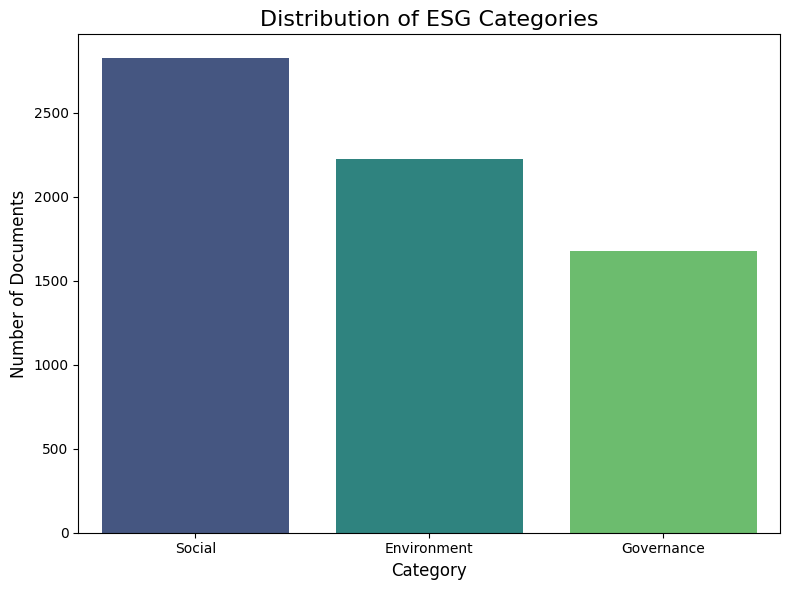

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of the 'category' column
category_counts = df['category'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of ESG Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Documents', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('category_distribution.png')
plt.show()

## Dataset Shape


In [24]:
df.shape

(6725, 16)

## Sample Data


In [25]:
df.head()

,title,publication_date,byline,content,subject,country,city,person,industry,company,word_count,publication_date_text,publication,author,copyright,category
0,3 Alternative Energy Funds Set to Gain From Im...,2020-12-07,Zacks Equity Research,3 Alternative Energy Funds Set to Gain From Im...,"['ENERGY & ENVIRONMENT', 'FINANCIAL MARKET UPD...","['UNITED STATES', 'EUROPE']",[],['JOE BIDEN'],"['SIC6282 INVESTMENT ADVICE', 'NAICS523920 POR...","['ZACKS INVESTMENT RESEARCH INC', 'INVESCO LTD...",1464,"December 7, 2020 Monday","['Newstex Blogs', 'Zacks Investment Research']",Zacks Equity Research,Copyright 2020 Newstex LLC All Rights Reserved,Environment
1,Secretary-General welcomes US return to Paris ...,2021-01-21,,Secretary-General welcomes US return to Paris ...,"['CLIMATE CHANGE REGULATION & POLICY', 'AGREEM...",['UNITED STATES'],"['GLASGOW, SCOTLAND']","['JOE BIDEN', 'BARACK OBAMA', 'DONALD TRUMP', ...","['EMISSIONS', 'CARBON NEUTRAL INITIATIVES', 'G...",[],482,"January 21, 2021 Thursday",['M2 PressWIRE'],,Copyright 2021 Normans Media Limited All Right...,Environment
2,OpEd: Beyond Biden: Climate Investing in 2021,2021-01-19,NinetyOne,OpEd: Beyond Biden: Climate Investing in 2021 ...,"['2021 US PRESIDENTIAL INAUGURATION', ""BIDEN'S...",['UNITED STATES'],[],"['DONALD TRUMP', 'JOE BIDEN', 'XI JINPING']","['ALTERNATIVE & RENEWABLE ENERGY', 'AUTOMOTIVE...",[],1202,"January 19, 2021 Tuesday","['Newstex Blogs', '3BL Blogs']",NinetyOne,Copyright 2021 Newstex LLC All Rights Reserved,Environment
3,Why Indian companies will need to adopt ESG pa...,2020-12-09,,Why Indian companies will need to adopt ESG pa...,"['ESG FACTORS', 'ETHICAL INVESTING', 'SUSTAINA...","['INDIA', 'UNITED STATES', 'CANADA', 'EUROPE',...","['NEW DELHI, INDIA']",['JOE BIDEN'],"['ETHICAL INVESTING', 'SUSTAINABLE INVESTING',...",[],595,"December 9, 2020 Wednesday",['Business Line'],,Copyright 2020 Business Line All Rights Reserved,Environment
4,Secretary-General welcomes US return to Paris ...,2021-01-22,,Secretary-General welcomes US return to Paris ...,"['CLIMATE CHANGE REGULATION & POLICY', 'AGREEM...",['UNITED STATES'],"['GLASGOW, SCOTLAND']","['JOE BIDEN', 'BARACK OBAMA', 'DONALD TRUMP', ...","['EMISSIONS', 'CARBON NEUTRAL INITIATIVES', 'G...",[],507,"January 22, 2021 Friday",['Impact News Service'],,Copyright 2021 Impact Media Limited All Rights...,Environment


## Checking null values


In [26]:
df.isnull().sum()

,0
title,0
publication_date,0
byline,0
content,0
subject,0
country,0
city,0
person,0
industry,0
company,0


In [27]:
df.columns

Index(['title', 'publication_date', 'byline', 'content', 'subject', 'country',
       'city', 'person', 'industry', 'company', 'word_count',
       'publication_date_text', 'publication', 'author', 'copyright',
       'category'],
      dtype='object')

# Drop duplicate

In [28]:
# Drop duplicate ESG documents (safe for BERTopic)
df = df.drop_duplicates(subset=["content"]).reset_index(drop=True)

In [29]:
df.shape

(5980, 16)

## Text Preprocessing (Cleaning Pipeline)

This function cleans raw news text before embedding and topic modeling.

**Cleaning steps**
1. Remove HTML tags.
2. Remove copyright and boilerplate phrases.
3. Remove URLs.
4. Remove publisher/media names (e.g., BBC, Reuters).
5. Remove structural artifacts (e.g., “source”, “updated”, “photo”).
6. Remove punctuation.
7. Normalize whitespace.
8. Remove English stopwords (via NLTK).

**Purpose**
- Reduce noise and non-informative tokens.
- Improve embedding quality.
- Produce cleaner, more coherent topics.

The function returns a cleaned string ready for BERTopic.


In [30]:
import re
import nltk
from nltk.corpus import stopwords
import string

# Download NLTK stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Remove HTML tags
    text = re.sub(r"<[^>]+>", " ", text)

    # Remove copyright & boilerplate (non-greedy; avoids wiping whole article)
    text = re.sub(r"(?i)\bcopyright\b.*?(?:all rights reserved\.?)?", " ", text)
    text = re.sub(r"(?i)\ball rights reserved\b", " ", text)

    # Remove URLs
    text = re.sub(r"http\S+|www\.\S+", " ", text)

    # Remove publishers / media names (keep as you had, but case-insensitive)
    text = re.sub(
        r"(?i)\b(bbc|cnn|forbes|bloomberg|reuters|associated press|guardian|nyt|wsj|ft|crikey|pajamas|newstex)\b",
        " ",
        text
    )

    # Remove structural/news artifacts (case-insensitive)
    text = re.sub(
        r"(?i)\b(source|sources|website|photo|photos|video|clip|gmt|utc|updated)\b",
        " ",
        text
    )

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Normalize whitespace before stop word removal
    text = re.sub(r"\s+", " ", text).strip()

    # Remove stopwords
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    text = " ".join(filtered_tokens)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
df["clean_content"] = df["content"].astype(str).apply(clean_text)
texts = df["clean_content"].tolist()

## Document Length Distribution

This cell computes and visualizes the length of each document (in number of words).

- `doc_length`: number of tokens in `clean_content`
- Histogram shows how document lengths are distributed across the dataset.

**Purpose**
- Detect very short or extremely long documents.
- Identify potential outliers.
- Understand overall corpus structure before topic modeling.

**Output:** Histogram saved as `document_length_distribution.png`.


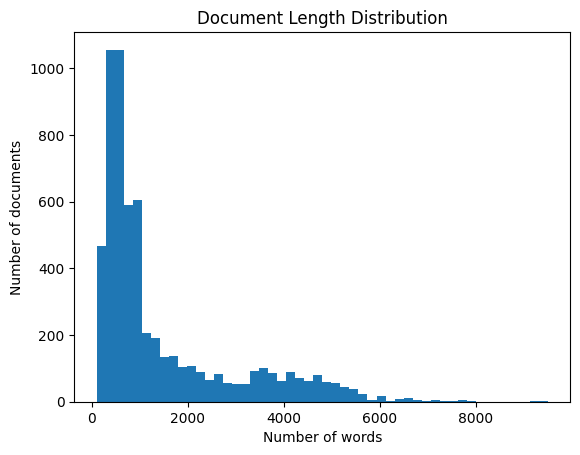

In [32]:
df["doc_length"] = df["clean_content"].str.split().str.len()

import matplotlib.pyplot as plt
plt.hist(df["doc_length"], bins=50)
plt.xlabel("Number of words")
plt.ylabel("Number of documents")
plt.title("Document Length Distribution")
plt.savefig("document_length_distribution.png")
plt.show()

## Top 20 Most Frequent Words

This cell identifies and visualizes the most common words in the cleaned corpus.

- All documents are concatenated.
- Word frequencies are computed using `Counter`.
- The top 20 most frequent words are plotted.

**Purpose**
- Quick sanity check of preprocessing.
- Detect remaining common or domain-dominant terms.
- Identify words that might still need filtering before modeling.

**Output:** Bar chart saved as `top_20_words.png`.


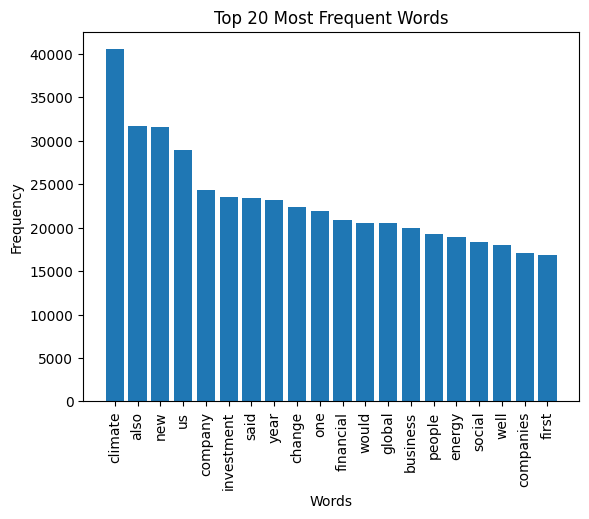

In [33]:
from collections import Counter

words = " ".join(df["clean_content"]).lower().split()
common_words = Counter(words).most_common(20)

labels, values = zip(*common_words)

plt.bar(labels, values)
plt.xticks(rotation=90)
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.savefig("top_20_words.png")
plt.show()


## Word Count vs Character Count

This plot compares document length measured in:
- **Word count** (`word_len`)
- **Character count** (`char_len`)

Each point represents one document.

**Purpose**
- Check consistency between word and character lengths.
- Detect abnormal documents (e.g., very long character strings with few words).
- Identify potential preprocessing issues.

**Output:** Scatter plot saved as `word_vs_char_length.png`.


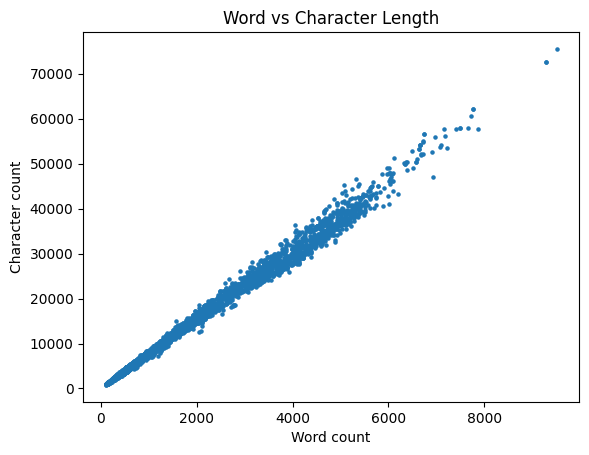

In [34]:
df["char_len"] = df["clean_content"].str.len()
df["word_len"] = df["clean_content"].str.split().str.len()

plt.scatter(df["word_len"], df["char_len"], s=5)
plt.xlabel("Word count")
plt.ylabel("Character count")
plt.title("Word vs Character Length")
plt.savefig("word_vs_char_length.png")
plt.show()


## Vocabulary Growth Curve

This cell tracks how the vocabulary size grows as more documents are added.

- Documents are processed in chunks (e.g., every 500 texts).
- After each chunk, the cumulative number of unique words is recorded.
- The curve shows how fast new vocabulary appears in the corpus.

**Purpose**
- Assess lexical diversity.
- Check whether vocabulary growth stabilizes (indicating corpus saturation).
- Understand dataset richness before topic modeling.

**Output:** Line plot saved as `vocabulary_growth.png`.


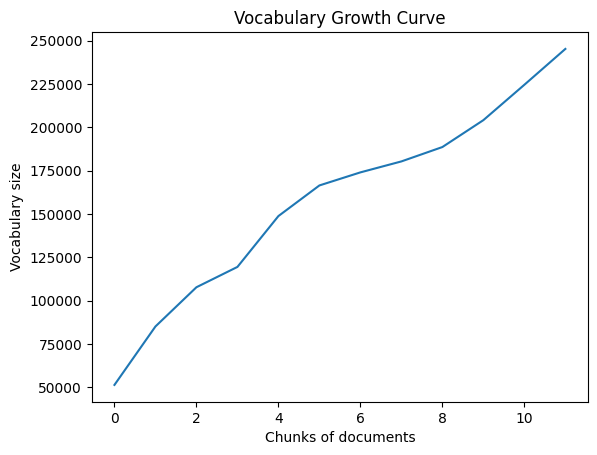

In [35]:
from itertools import islice

def vocab_growth(texts, step=500):
    vocab = set()
    sizes = []
    for i in range(0, len(texts), step):
        chunk = texts[i:i+step]
        for doc in chunk:
            vocab.update(doc.split())
        sizes.append(len(vocab))
    return sizes

vocab_sizes = vocab_growth(df["clean_content"].tolist())

plt.plot(vocab_sizes)
plt.xlabel("Chunks of documents")
plt.ylabel("Vocabulary size")
plt.title("Vocabulary Growth Curve")
plt.savefig("vocabulary_growth.png")
plt.show()


In [68]:
df.to_csv("preprocessed_dataset.csv", index=False)

In [70]:
from google.colab import files
files.download("preprocessed_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
pip install -U openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 2.17.0
    Uninstalling openai-2.17.0:
      Successfully uninstalled openai-2.17.0


In [37]:
!pip -q install bertopic sentence-transformers umap-learn hdbscan gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 44.7 MB/s eta 0:00:00


## Phase 1 — Embedding Backbone Experiments (BERTopic)

This section tests how different **SentenceTransformer embedding models** affect topic quality while keeping the rest of the BERTopic pipeline fixed.

**Pipeline**
1) **Embed documents** with a chosen transformer backbone (`SentenceTransformer(...).encode` with normalized embeddings).  
2) **Reduce dimensions** using **UMAP** (cosine metric, 50 components) to make clustering easier.  
3) **Cluster** reduced vectors using **HDBSCAN** (forms clusters + labels outliers as noise `-1`).  
4) **Build topics** with **BERTopic** using the same UMAP + HDBSCAN, and represent topics via `CountVectorizer` + `KeyBERTInspired`.  
5) **Evaluate** each backbone using:
   - `n_topics`: number of discovered topics (excluding noise)
   - `coverage` / `noise_ratio`: % assigned to a topic vs labeled `-1`
   - `coherence_cv`: interpretability of topic words (higher is better)
   - `topic_diversity`: how distinct topic vocabularies are (higher is better)
   - `dbcv`: density-based clustering validity (higher is better)
   - `mean_cluster_persistence`: HDBSCAN cluster stability (higher is better)

**Output**
We run the same setup for each embedding backbone (e.g., MiniLM vs MPNet), store the fitted models in `models_cache`, and create `results_df` to rank backbones (sorted by DBCV and coherence).

In [38]:
# =========================
# Phase 1: Embedding Backbone Experiments
# =========================
import numpy as np
import pandas as pd

from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

import umap
import hdbscan
from hdbscan.validity import validity_index  # DBCV
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess


# ---------- Helper metrics ----------
def topic_diversity(topic_words, top_k=10):
    """Proportion of unique words across all topics' top_k words."""
    words = [w for topic in topic_words for w in topic[:top_k]]
    if len(words) == 0:
        return np.nan
    return len(set(words)) / len(words)

def compute_coherence_cv(texts, topic_model, top_k=10):
    """Compute c_v coherence using gensim on tokenized docs and topic words."""
    tokenized_docs = [simple_preprocess(doc) for doc in texts]
    dictionary = Dictionary(tokenized_docs)

    # Extract topic words from BERTopic (exclude -1)
    topic_ids = [t for t in topic_model.get_topics().keys() if t != -1]
    topics_words = []
    for t in topic_ids:
        words = [w for w, _ in topic_model.get_topic(t)][:top_k]
        if len(words) > 1:
            topics_words.append(words)

    if len(topics_words) == 0:
        return np.nan

    cm = CoherenceModel(
        topics=topics_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence="c_v",
    )
    return cm.get_coherence()

def extract_topic_words(topic_model, top_k=10):
    """Return list of list of top_k words for each topic (exclude -1)."""
    topic_ids = [t for t in topic_model.get_topics().keys() if t != -1]
    topics_words = []
    for t in topic_ids:
        topics_words.append([w for w, _ in topic_model.get_topic(t)][:top_k])
    return topics_words


# ---------- Core experiment runner ----------
def run_phase1_experiment(
    texts,
    embedding_model_name: str,
    min_cluster_size: int = 50,
    random_state: int = 42,
):
    """
    Runs BERTopic with a fixed UMAP+HDBSCAN architecture and a specified embedding model.
    Returns: (metrics_dict, topic_model, topics, probs, clusterer, reduced_embeddings)
    """

    # Embeddings (Transformer backbone)
    st_model = SentenceTransformer(embedding_model_name)
    embeddings = st_model.encode(texts, show_progress_bar=True, normalize_embeddings=True)

    # UMAP for clustering (50D as per assignment)
    umap_model = umap.UMAP(
        n_neighbors=30,
        n_components=50,
        min_dist=0.0,
        metric="cosine",
        random_state=random_state,
    )
    reduced = umap_model.fit_transform(embeddings)

    # HDBSCAN clustering (explicit model so we can access internals)
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=None,
        metric="euclidean",  # works well on UMAP output
        cluster_selection_method="eom",
        prediction_data=True,
    )
    cluster_labels = clusterer.fit_predict(reduced)

    # BERTopic representation layer (use our clusterer + UMAP)
    vectorizer_model = CountVectorizer(stop_words="english", min_df=2, max_df=0.95)
    representation_model = KeyBERTInspired()

    topic_model = BERTopic(
        embedding_model=st_model,              # Fix: Pass the SentenceTransformer model
        umap_model=umap_model,             # fixed architecture
        hdbscan_model=clusterer,           # fixed architecture (and exposes internals)
        vectorizer_model=vectorizer_model,
        representation_model=representation_model,
        calculate_probabilities=True,
        verbose=False,
    )

    topics, probs = topic_model.fit_transform(texts, embeddings=embeddings)

    # --- Metrics ---
    n_docs = len(texts)
    n_topics = len([t for t in set(topics) if t != -1])
    coverage = float(np.mean(np.array(topics) != -1))
    noise_ratio = 1.0 - coverage

    # Coherence / Diversity
    coherence_cv = compute_coherence_cv(texts, topic_model, top_k=10)
    tw = extract_topic_words(topic_model, top_k=10)
    diversity = topic_diversity(tw, top_k=10)

    # DBCV (density-based cluster validity)
    # validity_index expects: X (data), labels. It ignores noise automatically.
    # If all points are noise or only 1 cluster, DBCV may error -> handle safely.
    try:
        dbcv = float(validity_index(reduced, cluster_labels))
    except Exception:
        dbcv = np.nan

    # Cluster persistence (stability) from HDBSCAN
    # cluster_persistence_ is aligned with selected clusters (not including noise).
    try:
        mean_persistence = float(np.mean(clusterer.cluster_persistence_)) if len(clusterer.cluster_persistence_) else np.nan
    except Exception:
        mean_persistence = np.nan

    metrics = {
        "embedding_model": embedding_model_name,
        "min_cluster_size": min_cluster_size,
        "n_topics": n_topics,
        "coverage": coverage,
        "noise_ratio": noise_ratio,
        "coherence_cv": coherence_cv,
        "topic_diversity": diversity,
        "dbcv": dbcv,
        "mean_cluster_persistence": mean_persistence,
    }

    return metrics, topic_model, topics, probs, clusterer, reduced


# ---------- Run Phase 1 across embedding backbones ----------
embedding_backbones = [
    "sentence-transformers/all-MiniLM-L6-v2",         # baseline
    "sentence-transformers/all-mpnet-base-v2",        # stronger
]
results = []
models_cache = {}

for name in embedding_backbones:
    print(f"\n=== Running Phase 1 with: {name} ===")
    metrics, topic_model, topics, probs, clusterer, reduced = run_phase1_experiment(
        texts=texts,
        embedding_model_name=name,
        min_cluster_size=50,
        random_state=42
    )
    results.append(metrics)
    models_cache[name] = {
        "topic_model": topic_model,
        "topics": topics,
        "probs": probs,
        "clusterer": clusterer,
        "reduced": reduced,
    }
    print(metrics)

results_df = pd.DataFrame(results).sort_values(["dbcv", "coherence_cv"], ascending=False)

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.



=== Running Phase 1 with: sentence-transformers/all-MiniLM-L6-v2 ===


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/187 [00:00<?, ?it/s]

{'embedding_model': 'sentence-transformers/all-MiniLM-L6-v2', 'min_cluster_size': 50, 'n_topics': 17, 'coverage': 0.6108695652173913, 'noise_ratio': 0.38913043478260867, 'coherence_cv': np.float64(0.4501061881275395), 'topic_diversity': 0.7647058823529411, 'dbcv': nan, 'mean_cluster_persistence': 0.2333162093127425}

=== Running Phase 1 with: sentence-transformers/all-mpnet-base-v2 ===


/usr/local/lib/python3.12/dist-packages/hdbscan/validity.py:30: RuntimeWarning: overflow encountered in power
  distance_matrix[distance_matrix != 0] = (1.0 / distance_matrix[
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

MPNetModel LOAD REPORT from: sentence-transformers/all-mpnet-base-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/187 [00:00<?, ?it/s]

{'embedding_model': 'sentence-transformers/all-mpnet-base-v2', 'min_cluster_size': 50, 'n_topics': 2, 'coverage': 0.998494983277592, 'noise_ratio': 0.0015050167224079924, 'coherence_cv': np.float64(0.5886961379210207), 'topic_diversity': 1.0, 'dbcv': nan, 'mean_cluster_persistence': 0.4605057461178761}


/usr/local/lib/python3.12/dist-packages/hdbscan/validity.py:30: RuntimeWarning: overflow encountered in power
  distance_matrix[distance_matrix != 0] = (1.0 / distance_matrix[
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [39]:
results_df

,embedding_model,min_cluster_size,n_topics,coverage,noise_ratio,coherence_cv,topic_diversity,dbcv,mean_cluster_persistence
1,sentence-transformers/all-mpnet-base-v2,50,2,0.998495,0.001505,0.588696,1.000000,NaN,0.460506
0,sentence-transformers/all-MiniLM-L6-v2,50,17,0.610870,0.389130,0.450106,0.764706,NaN,0.233316


## Phase 1b — Fix the embedding model, vary HDBSCAN strictness (`min_cluster_size`)

Here we keep the **same embedding backbone** (e.g., MiniLM) and the same UMAP setup, but we change **HDBSCAN strictness** by sweeping `min_cluster_size` (e.g., 50 → 30 → 20).

**Why this matters:** `min_cluster_size` controls how many documents are required to form a cluster (topic).
- Larger values (more strict) → **fewer, broader, more reliable** topics + typically **more noise**.
- Smaller values (less strict) → **more, finer** topics, but higher risk of **fragmented / unstable** topics.

For each setting we record:
- `hdbscan_clusters`: number of clusters found by HDBSCAN (excluding noise)
- `hdbscan_noise`: fraction of documents labeled as noise by HDBSCAN (`-1`)
- `n_topics`, `coverage`, `noise_ratio`: final BERTopic topic assignment stats
- `coherence_cv`, `topic_diversity`: topic interpretability and distinctness
- `dbcv`, `mean_cluster_persistence`: clustering validity and stability

**Output:** `results_df1` compares all `min_cluster_size` values for the chosen embedding model, and `models_cache[(embedding, mcs)]` stores the fitted objects for later inspection/plots.


In [41]:
# =========================
# Phase 1b: Same embeddings, vary HDBSCAN strictness (min_cluster_size)
# =========================

def run_phase1_experiment(
    texts,
    embedding_model_name: str,
    min_cluster_size: int = 50,
    random_state: int = 42,
):
    st_model = SentenceTransformer(embedding_model_name)
    embeddings = st_model.encode(
        texts, show_progress_bar=True, normalize_embeddings=True
    )

    # UMAP for clustering (50D; matches assignment-style setup)
    umap_model = umap.UMAP(
        n_neighbors=30,
        n_components=50,
        min_dist=0.0,
        metric="cosine",
        random_state=random_state,
    )
    reduced = umap_model.fit_transform(embeddings)

    # HDBSCAN
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=None,
        metric="euclidean",
        cluster_selection_method="eom",
        prediction_data=True,
    )
    cluster_labels = clusterer.fit_predict(reduced)

    # Debug counts (important)
    hdbscan_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    hdbscan_noise = float(np.mean(cluster_labels == -1))

    # BERTopic representation layer
    # IMPORTANT: c-TF-IDF uses "topic-documents", so keep min_df low
    vectorizer_model = CountVectorizer(stop_words="english", min_df=1, max_df=0.95)
    representation_model = KeyBERTInspired()

    topic_model = BERTopic(
        embedding_model=st_model,      # Fix: Pass the SentenceTransformer model
        umap_model=umap_model,
        hdbscan_model=clusterer,
        vectorizer_model=vectorizer_model,
        representation_model=representation_model,
        calculate_probabilities=True,
        verbose=False,
    )

    topics, probs = topic_model.fit_transform(texts, embeddings=embeddings)

    # --- Metrics ---
    n_topics = len([t for t in set(topics) if t != -1])
    coverage = float(np.mean(np.array(topics) != -1))
    noise_ratio = 1.0 - coverage

    coherence_cv = compute_coherence_cv(texts, topic_model, top_k=10)
    tw = extract_topic_words(topic_model, top_k=10)
    diversity = topic_diversity(tw, top_k=10)

    try:
        dbcv = float(validity_index(reduced, cluster_labels))
    except Exception:
        dbcv = np.nan

    try:
        mean_persistence = float(np.mean(clusterer.cluster_persistence_)) if len(clusterer.cluster_persistence_) else np.nan
    except Exception:
        mean_persistence = np.nan

    metrics = {
        "embedding_model": embedding_model_name,
        "min_cluster_size": min_cluster_size,
        "hdbscan_clusters": hdbscan_clusters,
        "hdbscan_noise": hdbscan_noise,
        "n_topics": n_topics,
        "coverage": coverage,
        "noise_ratio": noise_ratio,
        "coherence_cv": coherence_cv,
        "topic_diversity": diversity,
        "dbcv": dbcv,
        "mean_cluster_persistence": mean_persistence,
    }

    return metrics, topic_model, topics, probs, clusterer, reduced


embedding_backbones = [
    "sentence-transformers/all-MiniLM-L6-v2"
    ]

cluster_sizes = [50, 30, 20]  # strict -> less strict

results = []
models_cache = {}

for name in embedding_backbones:
    for mcs in cluster_sizes:
        print(f"\n=== Embedding: {name} | min_cluster_size: {mcs} ===")
        metrics, topic_model, topics, probs, clusterer, reduced = run_phase1_experiment(
            texts=texts,
            embedding_model_name=name,
            min_cluster_size=mcs,
            random_state=42
        )
        results.append(metrics)
        models_cache[(name, mcs)] = {
            "topic_model": topic_model,
            "topics": topics,
            "probs": probs,
            "clusterer": clusterer,
            "reduced": reduced,
        }
        print(metrics)

results_df1 = pd.DataFrame(results).sort_values(
    ["embedding_model", "min_cluster_size"], ascending=[True, False]
)


=== Embedding: sentence-transformers/all-MiniLM-L6-v2 | min_cluster_size: 50 ===


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/187 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/hdbscan/validity.py:30: RuntimeWarning: overflow encountered in power
  distance_matrix[distance_matrix != 0] = (1.0 / distance_matrix[
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


{'embedding_model': 'sentence-transformers/all-MiniLM-L6-v2', 'min_cluster_size': 50, 'hdbscan_clusters': 17, 'hdbscan_noise': 0.38913043478260867, 'n_topics': 17, 'coverage': 0.6108695652173913, 'noise_ratio': 0.38913043478260867, 'coherence_cv': np.float64(0.4495885361053864), 'topic_diversity': 0.7588235294117647, 'dbcv': nan, 'mean_cluster_persistence': 0.2333162093127425}

=== Embedding: sentence-transformers/all-MiniLM-L6-v2 | min_cluster_size: 30 ===


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/187 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/hdbscan/validity.py:30: RuntimeWarning: overflow encountered in power
  distance_matrix[distance_matrix != 0] = (1.0 / distance_matrix[
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


{'embedding_model': 'sentence-transformers/all-MiniLM-L6-v2', 'min_cluster_size': 30, 'hdbscan_clusters': 25, 'hdbscan_noise': 0.3494983277591973, 'n_topics': 25, 'coverage': 0.6505016722408027, 'noise_ratio': 0.3494983277591973, 'coherence_cv': np.float64(0.4752338675423824), 'topic_diversity': 0.756, 'dbcv': nan, 'mean_cluster_persistence': 0.19533052164710893}

=== Embedding: sentence-transformers/all-MiniLM-L6-v2 | min_cluster_size: 20 ===


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/187 [00:00<?, ?it/s]

{'embedding_model': 'sentence-transformers/all-MiniLM-L6-v2', 'min_cluster_size': 20, 'hdbscan_clusters': 40, 'hdbscan_noise': 0.3419732441471572, 'n_topics': 40, 'coverage': 0.6580267558528428, 'noise_ratio': 0.34197324414715724, 'coherence_cv': np.float64(0.5331130146306169), 'topic_diversity': 0.5425, 'dbcv': nan, 'mean_cluster_persistence': 0.14603204200238587}


/usr/local/lib/python3.12/dist-packages/hdbscan/validity.py:30: RuntimeWarning: overflow encountered in power
  distance_matrix[distance_matrix != 0] = (1.0 / distance_matrix[


In [43]:
results_df1

,embedding_model,min_cluster_size,hdbscan_clusters,hdbscan_noise,n_topics,coverage,noise_ratio,coherence_cv,topic_diversity,dbcv,mean_cluster_persistence
0,sentence-transformers/all-MiniLM-L6-v2,50,17,0.389130,17,0.610870,0.389130,0.449589,0.758824,NaN,0.233316
1,sentence-transformers/all-MiniLM-L6-v2,30,25,0.349498,25,0.650502,0.349498,0.475234,0.756000,NaN,0.195331
2,sentence-transformers/all-MiniLM-L6-v2,20,40,0.341973,40,0.658027,0.341973,0.533113,0.542500,NaN,0.146032


## Phase 2 — UMAP Ablation (MiniLM only)

In this phase we **fix the embedding backbone (MiniLM)** and **fix HDBSCAN**, then vary only the **UMAP parameter `n_neighbors`** to see how the local/global structure affects clustering and topic quality.

- `n_neighbors` controls how much **local vs global** structure UMAP preserves:
  - higher (e.g., 30) → more global structure, smoother clusters
  - lower (e.g., 15) → more local structure, can split topics into finer groups

**Pipeline (unchanged except UMAP)**
1) Embed texts using **MiniLM** sentence embeddings (normalized).  
2) Reduce to 50D with **UMAP** using different `n_neighbors`.  
3) Cluster using **HDBSCAN** (`min_cluster_size=50`).  
4) Fit **BERTopic** with the same UMAP+HDBSCAN and represent topics with `CountVectorizer` + `KeyBERTInspired`.  
5) Compare settings using:
   - cluster stats: `hdbscan_clusters`, `hdbscan_noise`
   - topic stats: `n_topics`, `coverage`, `noise_ratio`
   - quality/stability: `coherence_cv`, `topic_diversity`, `mean_cluster_persistence`

**Output**
- `phase2_df` summarizes results for each `n_neighbors`.
- `phase2_models[n_neighbors]` stores the fitted topic model + assignments for later inspection.

In [44]:
# =========================
# Phase 2: UMAP Ablation (MiniLM only)
# =========================

import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from sklearn.feature_extraction.text import CountVectorizer

import umap
import hdbscan
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess


# ---------- Helper metrics ----------
def topic_diversity(topic_words, top_k=10):
    words = [w for topic in topic_words for w in topic[:top_k]]
    return len(set(words)) / len(words) if len(words) else np.nan


def extract_topic_words(topic_model, top_k=10):
    topic_ids = [t for t in topic_model.get_topics().keys() if t != -1]
    return [
        [w for w, _ in topic_model.get_topic(t)][:top_k]
        for t in topic_ids
    ]


def compute_coherence_cv(texts, topic_model, top_k=10):
    tokenized_docs = [simple_preprocess(doc) for doc in texts]
    dictionary = Dictionary(tokenized_docs)

    topic_ids = [t for t in topic_model.get_topics().keys() if t != -1]
    topics_words = []
    for t in topic_ids:
        words = [w for w, _ in topic_model.get_topic(t)][:top_k]
        if len(words) > 1:
            topics_words.append(words)

    if not topics_words:
        return np.nan

    cm = CoherenceModel(
        topics=topics_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence="c_v",
    )
    return cm.get_coherence()


# ---------- Phase 2 runner ----------
def run_phase2_umap_minilm(
    texts,
    umap_n_neighbors,
    min_cluster_size=50,
    random_state=42,
):
    # 1) Embeddings (MiniLM)
    st_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
    embeddings = st_model.encode(
        texts, show_progress_bar=True, normalize_embeddings=True
    )

    # 2) UMAP (architecture knob)
    umap_model = umap.UMAP(
        n_neighbors=umap_n_neighbors,
        n_components=50,
        min_dist=0.0,
        metric="cosine",
        random_state=random_state,
    )
    reduced = umap_model.fit_transform(embeddings)

    # 3) HDBSCAN (fixed)
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=None,
        metric="euclidean",
        cluster_selection_method="eom",
        prediction_data=True,
    )
    cluster_labels = clusterer.fit_predict(reduced)

    hdbscan_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    hdbscan_noise = float(np.mean(cluster_labels == -1))

    # 4) BERTopic (representation only)
    vectorizer_model = CountVectorizer(
        stop_words="english",
        min_df=1,          # IMPORTANT for c-TF-IDF
        max_df=0.95
    )

    topic_model = BERTopic(
        embedding_model=st_model, # Fix: Pass the SentenceTransformer model
        umap_model=umap_model,
        hdbscan_model=clusterer,
        vectorizer_model=vectorizer_model,
        representation_model=KeyBERTInspired(),
        calculate_probabilities=True,
        verbose=False,
    )

    topics, probs = topic_model.fit_transform(texts, embeddings=embeddings)

    # 5) Metrics
    n_topics = len([t for t in set(topics) if t != -1])
    coverage = float(np.mean(np.array(topics) != -1))
    noise_ratio = 1.0 - coverage

    coherence = compute_coherence_cv(texts, topic_model, top_k=10)
    diversity = topic_diversity(extract_topic_words(topic_model), top_k=10)

    try:
        mean_persistence = float(np.mean(clusterer.cluster_persistence_))
    except Exception:
        mean_persistence = np.nan

    metrics = {
        "embedding_model": "MiniLM",
        "umap_n_neighbors": umap_n_neighbors,
        "min_cluster_size": min_cluster_size,
        "hdbscan_clusters": hdbscan_clusters,
        "hdbscan_noise": hdbscan_noise,
        "n_topics": n_topics,
        "coverage": coverage,
        "noise_ratio": noise_ratio,
        "coherence_cv": coherence,
        "topic_diversity": diversity,
        "mean_cluster_persistence": mean_persistence,
    }

    return metrics, topic_model, topics, probs, clusterer, reduced


# ---------- Run Phase 2 ----------
umap_neighbors_list = [30, 15]  # baseline vs local

phase2_results = []
phase2_models = {}

for nn in umap_neighbors_list:
    print(f"\n=== Phase 2 | MiniLM | UMAP n_neighbors={nn} ===")
    metrics, tm, topics, probs, clusterer, reduced = run_phase2_umap_minilm(
        texts=texts,
        umap_n_neighbors=nn,
        min_cluster_size=50,
        random_state=42,
    )
    phase2_results.append(metrics)
    phase2_models[nn] = {
        "topic_model": tm,
        "topics": topics,
        "clusterer": clusterer,
        "reduced": reduced,
    }
    print(metrics)

phase2_df = pd.DataFrame(phase2_results)


=== Phase 2 | MiniLM | UMAP n_neighbors=30 ===


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/187 [00:00<?, ?it/s]

{'embedding_model': 'MiniLM', 'umap_n_neighbors': 30, 'min_cluster_size': 50, 'hdbscan_clusters': 17, 'hdbscan_noise': 0.38913043478260867, 'n_topics': 17, 'coverage': 0.6108695652173913, 'noise_ratio': 0.38913043478260867, 'coherence_cv': np.float64(0.4495885361053864), 'topic_diversity': 0.7588235294117647, 'mean_cluster_persistence': 0.2333162093127425}

=== Phase 2 | MiniLM | UMAP n_neighbors=15 ===


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/187 [00:00<?, ?it/s]

{'embedding_model': 'MiniLM', 'umap_n_neighbors': 15, 'min_cluster_size': 50, 'hdbscan_clusters': 18, 'hdbscan_noise': 0.3782608695652174, 'n_topics': 18, 'coverage': 0.6217391304347826, 'noise_ratio': 0.37826086956521743, 'coherence_cv': np.float64(0.48023695840634795), 'topic_diversity': 0.8055555555555556, 'mean_cluster_persistence': 0.21588053057483675}


In [45]:
phase2_df

,embedding_model,umap_n_neighbors,min_cluster_size,hdbscan_clusters,hdbscan_noise,n_topics,coverage,noise_ratio,coherence_cv,topic_diversity,mean_cluster_persistence
0,MiniLM,30,50,17,0.389130,17,0.610870,0.389130,0.449589,0.758824,0.233316
1,MiniLM,15,50,18,0.378261,18,0.621739,0.378261,0.480237,0.805556,0.215881


## Phase 3 — HDBSCAN `min_samples` Ablation (MiniLM only)

In this phase we keep the setup fixed (**MiniLM embeddings + UMAP choice from Phase 2 + `min_cluster_size=50`**) and vary only **HDBSCAN `min_samples`** to control how conservative the clustering is.

- `min_samples` controls how strict HDBSCAN is when deciding whether a point belongs to a dense region.
  - higher `min_samples` → **more conservative**, typically **more noise** and **fewer/stronger clusters**
  - lower `min_samples` → **less conservative**, can keep more points in clusters but may create less stable structure

For each value of `min_samples` we track:
- `hdbscan_clusters` and `hdbscan_noise` (clustering behavior)
- `n_topics`, `coverage`, `noise_ratio` (final topic assignment)
- `mean_cluster_persistence` (cluster stability from HDBSCAN)

**Output**
- `phase3_df` compares the `min_samples` settings (e.g., 5 vs 15 vs 30).
- `phase3_models[min_samples]` stores the fitted topic model + clusterer for inspection.

In [46]:
# =========================
# Phase 3: HDBSCAN min_samples Ablation (MiniLM only)
# =========================

import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from sklearn.feature_extraction.text import CountVectorizer

import umap
import hdbscan


def run_phase3_minsamples(
    texts,
    min_samples,
    min_cluster_size=50,
    random_state=42,
):
    # 1) Embeddings (MiniLM)
    st_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
    embeddings = st_model.encode(
        texts, show_progress_bar=True, normalize_embeddings=True
    )

    # 2) UMAP (FINAL choice from Phase 2)
    umap_model = umap.UMAP(
        n_neighbors=30,
        n_components=50,
        min_dist=0.0,
        metric="cosine",
        random_state=random_state,
    )
    reduced = umap_model.fit_transform(embeddings)

    # 3) HDBSCAN (architecture knob = min_samples)
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        min_samples=min_samples,
        metric="euclidean",
        cluster_selection_method="eom",
        prediction_data=True,
    )
    cluster_labels = clusterer.fit_predict(reduced)

    hdbscan_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    hdbscan_noise = float(np.mean(cluster_labels == -1))

    # 4) BERTopic representation
    vectorizer_model = CountVectorizer(
        stop_words="english",
        min_df=1,
        max_df=0.95
    )

    topic_model = BERTopic(
        embedding_model=st_model,
        umap_model=umap_model,
        hdbscan_model=clusterer,
        vectorizer_model=vectorizer_model,
        representation_model=KeyBERTInspired(),
        calculate_probabilities=True,
        verbose=False,
    )

    topics, probs = topic_model.fit_transform(texts, embeddings=embeddings)

    # 5) Metrics
    n_topics = len([t for t in set(topics) if t != -1])
    coverage = float(np.mean(np.array(topics) != -1))
    noise_ratio = 1.0 - coverage

    try:
        mean_persistence = float(np.mean(clusterer.cluster_persistence_))
    except Exception:
        mean_persistence = np.nan

    metrics = {
        "embedding_model": "MiniLM",
        "umap_n_neighbors": 30,
        "min_cluster_size": min_cluster_size,
        "min_samples": min_samples,
        "hdbscan_clusters": hdbscan_clusters,
        "hdbscan_noise": hdbscan_noise,
        "n_topics": n_topics,
        "coverage": coverage,
        "noise_ratio": noise_ratio,
        "mean_cluster_persistence": mean_persistence,
    }

    return metrics, topic_model, topics, probs, clusterer, reduced


# ---------- Run Phase 3 ----------
min_samples_grid = [5, 15, 30]

phase3_results = []
phase3_models = {}

for ms in min_samples_grid:
    print(f"\n=== Phase 3 | MiniLM | min_samples={ms} ===")
    metrics, tm, topics, probs, clusterer, reduced = run_phase3_minsamples(
        texts=texts,
        min_samples=ms,
        min_cluster_size=50,
        random_state=42,
    )
    phase3_results.append(metrics)
    phase3_models[ms] = {
        "topic_model": tm,
        "topics": topics,
        "clusterer": clusterer,
        "reduced": reduced,
    }
    print(metrics)

phase3_df = pd.DataFrame(phase3_results)


=== Phase 3 | MiniLM | min_samples=5 ===


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/187 [00:00<?, ?it/s]

{'embedding_model': 'MiniLM', 'umap_n_neighbors': 30, 'min_cluster_size': 50, 'min_samples': 5, 'hdbscan_clusters': 27, 'hdbscan_noise': 0.288628762541806, 'n_topics': 27, 'coverage': 0.711371237458194, 'noise_ratio': 0.288628762541806, 'mean_cluster_persistence': 0.1955344347145927}

=== Phase 3 | MiniLM | min_samples=15 ===


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/187 [00:00<?, ?it/s]

{'embedding_model': 'MiniLM', 'umap_n_neighbors': 30, 'min_cluster_size': 50, 'min_samples': 15, 'hdbscan_clusters': 24, 'hdbscan_noise': 0.3466555183946488, 'n_topics': 24, 'coverage': 0.6533444816053512, 'noise_ratio': 0.3466555183946488, 'mean_cluster_persistence': 0.22503516743023821}

=== Phase 3 | MiniLM | min_samples=30 ===


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/187 [00:00<?, ?it/s]

{'embedding_model': 'MiniLM', 'umap_n_neighbors': 30, 'min_cluster_size': 50, 'min_samples': 30, 'hdbscan_clusters': 20, 'hdbscan_noise': 0.35986622073578595, 'n_topics': 20, 'coverage': 0.640133779264214, 'noise_ratio': 0.359866220735786, 'mean_cluster_persistence': 0.23625873267724645}


In [47]:
phase3_df

,embedding_model,umap_n_neighbors,min_cluster_size,min_samples,hdbscan_clusters,hdbscan_noise,n_topics,coverage,noise_ratio,mean_cluster_persistence
0,MiniLM,30,50,5,27,0.288629,27,0.711371,0.288629,0.195534
1,MiniLM,30,50,15,24,0.346656,24,0.653344,0.346656,0.225035
2,MiniLM,30,50,30,20,0.359866,20,0.640134,0.359866,0.236259


## Final BERTopic Model — Train + Evaluate + Export Results

This cell trains the **final topic model** using the best hyperparameters chosen from earlier phases (embedding backbone, UMAP, and HDBSCAN).  
It then computes summary quality metrics, exports topic tables/metrics, and attaches the final topic assignments back to the original dataframe.

**Inputs (required)**
- `texts`: list of cleaned document strings (row-aligned with `df`)
- `df`: dataframe with the same number of rows as `texts`

**Final architecture (fixed)**
- **Embeddings:** MiniLM sentence embeddings (`normalize_embeddings=True`)
- **UMAP:** reduces embeddings to 50D for clustering (`n_neighbors=30`)
- **HDBSCAN:** clusters reduced vectors and labels outliers as noise (`min_cluster_size=50`, `min_samples=5`)
- **Topic representation:** `CountVectorizer` + `KeyBERTInspired` for interpretable topic words/names

**What gets computed**
- `n_topics`: topics excluding noise (`-1`)
- `coverage` / `noise_ratio`: % assigned to a topic vs noise
- `coherence_cv`: topic interpretability score (higher is better)
- `topic_diversity`: how distinct topic vocabularies are (higher is better)
- `mean_cluster_persistence`: HDBSCAN stability (higher is better)

**Outputs saved**
- `final_topic_info.csv`: topic table (sizes, names, top words)
- `final_topic_metrics.csv`: one-row summary of final metrics + parameters
- `final_df_with_topics.csv`: original dataframe with added columns:
  - `topic` (topic id; `-1` = noise)
  - `topic_confidence` (max probability per document, if available)
  - `topic_name` (human-readable label from BERTopic)


In [48]:
import numpy as np
import pandas as pd

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from sklearn.feature_extraction.text import CountVectorizer

import umap
import hdbscan

from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.utils import simple_preprocess


# ---------- Helpers ----------
def extract_topic_words(topic_model, top_k=10):
    topic_ids = [t for t in topic_model.get_topics().keys() if t != -1]
    return [[w for w, _ in topic_model.get_topic(t)][:top_k] for t in topic_ids]

def topic_diversity(topic_words, top_k=10):
    words = [w for topic in topic_words for w in topic[:top_k]]
    return len(set(words)) / len(words) if len(words) else np.nan

def compute_coherence_cv(texts, topic_model, top_k=10):
    tokenized_docs = [simple_preprocess(doc) for doc in texts]
    dictionary = Dictionary(tokenized_docs)

    topic_ids = [t for t in topic_model.get_topics().keys() if t != -1]
    topics_words = []
    for t in topic_ids:
        words = [w for w, _ in topic_model.get_topic(t)][:top_k]
        if len(words) > 1:
            topics_words.append(words)

    if not topics_words:
        return np.nan

    cm = CoherenceModel(
        topics=topics_words,
        texts=tokenized_docs,
        dictionary=dictionary,
        coherence="c_v",
    )
    return cm.get_coherence()


# =========================
# 1) Inputs (YOU MUST HAVE THESE)
# =========================
# texts = list of cleaned document strings (e.g., df["clean_content"].tolist())
# df    = your dataframe that corresponds 1-to-1 with texts

assert isinstance(texts, list) and len(texts) > 0, "texts must be a non-empty list of strings"
assert len(df) == len(texts), "df and texts must have the same length (row-aligned)"


# =========================
# 2) FINAL ARCHITECTURE
# =========================
EMBED_MODEL = "sentence-transformers/all-MiniLM-L6-v2"

UMAP_PARAMS = dict(
    n_neighbors=30,
    n_components=50,
    min_dist=0.0,
    metric="cosine",
    random_state=42
)

HDBSCAN_PARAMS = dict(
    min_cluster_size=50,
    min_samples=5,
    metric="euclidean",
    cluster_selection_method="eom",
    prediction_data=True
)

VECTORIZER_PARAMS = dict(
    stop_words="english",
    min_df=5,      # important for c-TF-IDF topic-documents
    max_df=0.95
)

TOP_K_WORDS = 10


# =========================
# 3) Train the model
# =========================
# Embeddings
st_model = SentenceTransformer(EMBED_MODEL)
embeddings = st_model.encode(texts, show_progress_bar=True, normalize_embeddings=True)

# UMAP
umap_model = umap.UMAP(**UMAP_PARAMS)
reduced = umap_model.fit_transform(embeddings)

# HDBSCAN
clusterer = hdbscan.HDBSCAN(**HDBSCAN_PARAMS)
cluster_labels = clusterer.fit_predict(reduced)

# BERTopic
vectorizer_model = CountVectorizer(**VECTORIZER_PARAMS)
representation_model = KeyBERTInspired()

topic_model = BERTopic(
    embedding_model=st_model,           # Fix: Pass the SentenceTransformer model
    umap_model=umap_model,
    hdbscan_model=clusterer,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,
    calculate_probabilities=True,
    verbose=False
)

topics, probs = topic_model.fit_transform(texts, embeddings=embeddings)


# =========================
# 4) Compute metrics
# =========================
n_docs = len(texts)
n_topics = len([t for t in set(topics) if t != -1])
coverage = float(np.mean(np.array(topics) != -1))
noise_ratio = 1.0 - coverage

coherence_cv = compute_coherence_cv(texts, topic_model, top_k=TOP_K_WORDS)
tw = extract_topic_words(topic_model, top_k=TOP_K_WORDS)
diversity = topic_diversity(tw, top_k=TOP_K_WORDS)

try:
    mean_persistence = float(np.mean(clusterer.cluster_persistence_))
except Exception:
    mean_persistence = np.nan

metrics = {
    "embedding_model": EMBED_MODEL,
    "umap_params": UMAP_PARAMS,
    "hdbscan_params": HDBSCAN_PARAMS,
    "n_docs": n_docs,
    "n_topics": n_topics,
    "coverage": coverage,
    "noise_ratio": noise_ratio,
    "coherence_cv": coherence_cv,
    "topic_diversity": diversity,
    "mean_cluster_persistence": mean_persistence,
}

print("\n===== FINAL METRICS =====")
for k, v in metrics.items():
    print(f"{k}: {v}")


# =========================
# 5) Topic outputs
# =========================
topic_info = topic_model.get_topic_info()
print("\n===== TOPIC INFO (head) =====")
print(topic_info.head(20))

# Save topic info + metrics
topic_info.to_csv("final_topic_info.csv", index=False)
pd.DataFrame([metrics]).to_csv("final_topic_metrics.csv", index=False)

print("\nSaved: final_topic_info.csv, final_topic_metrics.csv")


# =========================
# 6) Attach topics back to df (ready for actor-issue analysis)
# =========================
df = df.copy()
df["topic"] = topics

# Optional: store max probability (confidence) per doc
if probs is not None:
    df["topic_confidence"] = probs.max(axis=1)
else:
    df["topic_confidence"] = np.nan

# Optional: attach topic name/label
topic_name_map = dict(zip(topic_info["Topic"], topic_info["Name"]))
df["topic_name"] = df["topic"].map(topic_name_map)

# Save final df
df.to_csv("final_df_with_topics.csv", index=False)
print("Saved: final_df_with_topics.csv")

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Batches:   0%|          | 0/187 [00:00<?, ?it/s]


===== FINAL METRICS =====
embedding_model: sentence-transformers/all-MiniLM-L6-v2
umap_params: {'n_neighbors': 30, 'n_components': 50, 'min_dist': 0.0, 'metric': 'cosine', 'random_state': 42}
hdbscan_params: {'min_cluster_size': 50, 'min_samples': 5, 'metric': 'euclidean', 'cluster_selection_method': 'eom', 'prediction_data': True}
n_docs: 5980
n_topics: 27
coverage: 0.711371237458194
noise_ratio: 0.288628762541806
coherence_cv: 0.49245473412598717
topic_diversity: 0.7407407407407407
mean_cluster_persistence: 0.1955344347145927

===== TOPIC INFO (head) =====
    Topic  Count                                               Name  \
0      -1   1726                -1_warming_fuels_stakeholders_biden   
1       0    642        0_kyoto_secretarygeneral_warming_mitigation   
2       1    397                         1_cfo_filings_thomson_weve   
3       2    344  2_organisations_cryptocurrencies_ecosystem_fin...   
4       3    257                3_multilateral_minister_2030_reform   
5       

In [67]:
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1726,-1_Climate Change Policy and Action,[Climate Change Policy and Action],[April 07 2024 Media Trumps Land Peace Proposa...
1,0,642,0_Climate Change and Global Security,[Climate Change and Global Security],[CoP26 less 100 months left climate redline de...
2,1,397,1_Financial Performance and Strategies,[Financial Performance and Strategies],[Event Brief Q3 2022 Bank New York Mellon Corp...
3,2,344,2_Diversity In Finance and Banking,[Diversity In Finance and Banking],[Corporate Tech Crypto mania Assif Shameen bit...
4,3,257,3_China's Green Development and Cooperation,[China's Green Development and Cooperation],[China Renewable Energy 14 Feb 24 Weeks News C...
5,4,252,4_UK Government Climate Change Policy,[UK Government Climate Change Policy],[Labour set finally abandon £28 billion green ...
6,5,199,5_Microsoft Stock Transactions And Ratings,[Microsoft Stock Transactions And Ratings],[Capital Wealth Planning LLC Acquires 88918 Sh...
7,6,176,6_Sustainable Finance and Investment,[Sustainable Finance and Investment],[Register Commission documents COMMUNICATION C...
8,7,167,7_Buhari Administration Achievements,[Buhari Administration Achievements],[ICYMIAso Rock silences Buhari naysayers catal...
9,8,160,8_EU Foreign Affairs and Summits,[EU Foreign Affairs and Summits],[Political General News Events June 7 June 7 d...


In [50]:
import os
import openai
from bertopic.representation import OpenAI

# Colab: Environment variable setup


In [51]:
# ===== Colab: Environment variable setup =====
import os
from getpass import getpass

# Securely enter your OpenAI API key (input will be hidden)
os.environ["OPENAI_API_KEY"] = getpass("Enter your OpenAI API key: ")

# Optional check (prints only last 4 chars)
print("OPENAI_API_KEY set ✓", "****" + os.environ["OPENAI_API_KEY"][-4:])

Enter your OpenAI API key: ··········
OPENAI_API_KEY set ✓ ****h-UA


## LLM-based Topic Labels

This step improves **topic names** using an LLM *after* the BERTopic model is already trained.  
Important: **clusters/topics do not change** — only the **human-readable labels/representations** are updated.

**How it works**
- For each topic, BERTopic provides:
  - top keywords (from c-TF-IDF)
  - representative documents
- We send these to an OpenAI model with a strict prompt and request a **short label (2–6 words)**.
- `topic_model.update_topics(...)` updates the topic representations in-place.

**Requirements**
- `OPENAI_API_KEY` must be set in the environment.
- This step may take time and can hit rate limits, so a small delay is added (`delay_in_seconds=1`).

**Output**
- `topic_info_llm = topic_model.get_topic_info()` now shows the updated **LLM-generated topic names** in the `Name` column.


In [54]:
# =========================
# LLM Topic Labelling (OpenAI) - post-hoc (keeps same topics)
# =========================
import os
import openai
from bertopic.representation import OpenAI as BERTopicOpenAI

# 1) OpenAI client (expects OPENAI_API_KEY already set in env)
client = openai.OpenAI(api_key=os.environ["OPENAI_API_KEY"])

# 2) Prompt (keywords + representative docs -> short label)
prompt = """
You are labeling topics from BERTopic for a research thesis.
Given the topic keywords and representative document snippets, return ONLY a short, specific label (2–6 words).
Use title case. Avoid vague labels like "General News".

Keywords: [KEYWORDS]

Representative documents:
[DOCUMENTS]

Topic label:
""".strip()

llm_representation = BERTopicOpenAI(
    client=client,
    model="gpt-4o-mini",
    prompt=prompt,
    delay_in_seconds=1
)

# 3) Update topic representations (NO re-clustering)
topic_model.update_topics(texts, representation_model=llm_representation)

# 4) Get updated topic info + map labels back to df
topic_info = topic_model.get_topic_info()

# Ensure df has topic assignments already
df = df.copy()
df["topic"] = topics

# Map LLM-updated names
topic_name_map = dict(zip(topic_info["Topic"], topic_info["Name"]))
df["topic_name"] = df["topic"].map(topic_name_map)

# Optional sanity check
print(topic_info[["Topic", "Count", "Name"]].head(20))
print("Example df labels:", df[["topic", "topic_name"]].head(10))


    Topic  Count                                           Name
0      -1   1726            -1_Climate Change Policy and Action
1       0    642           0_Climate Change and Global Security
2       1    397         1_Financial Performance and Strategies
3       2    344             2_Diversity In Finance and Banking
4       3    257    3_China's Green Development and Cooperation
5       4    252          4_UK Government Climate Change Policy
6       5    199     5_Microsoft Stock Transactions And Ratings
7       6    176           6_Sustainable Finance and Investment
8       7    167           7_Buhari Administration Achievements
9       8    160               8_EU Foreign Affairs and Summits
10      9    145         9_ESG Investment Trends and Challenges
11     10    132      10_Racial Disparities in Criminal Justice
12     11    129       11_ESG Investments and Electric Vehicles
13     12    117           12_Media Coverage of Biden and Trump
14     13    108               13_Greenh

## Actor Extraction + Reshaping (Long Format) for Actor–Topic Analysis

This cell prepares the dataset for **actor-level analysis** by converting actor columns (e.g., people, firms) into a clean **long-form table** where each row represents **one actor mentioned in one document**, linked to the document’s topic.

**What this does**
1) **Parses actor columns into lists** (handles cases like:
   - actual Python lists,
   - strings like `"['A', 'B']"`,
   - comma/semicolon/pipe-separated strings).
2) **Cleans actor names** (removes extra spaces) to reduce duplicates.
3) **Removes noise topics** (`topic = -1`) so actor–topic mapping focuses on meaningful clusters.
4) **Explodes** actor lists into multiple rows → one row per actor mention.

**Configuration**
- `ACTOR_COLS` maps dataframe columns to an actor type label (e.g., `person → Politician`, `company → Firm`).
- `TOPIC_COL` is the numeric topic id column (from BERTopic).
- `TOPIC_NAME_COL` is optional and, if present, is carried into the output.

**Output**
- `actors_long`: long-form table with columns like:
  - `topic` (and optionally `topic_name`)
  - `actor` (single cleaned actor string)
  - `actor_type` (e.g., Politician/Firm)

This long format is the standard input for downstream aggregations such as:
- top actors per topic,
- actor–topic frequency matrices,
- actor networks or co-occurrence graphs.


In [55]:
import pandas as pd
import numpy as np
import ast
import re

# =========================
# 0) Configure your actor columns here
# =========================
ACTOR_COLS = {
    "person": "Politician",
    "company": "Firm",
}
TOPIC_COL = "topic"          # your topic assignment column
TOPIC_NAME_COL = "topic_name"  # optional; if not present, code still works

# -------------------------
# 1) Robust list parser
# -------------------------
def to_list(x):
    """Convert cell to a list of strings."""
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return []
    if isinstance(x, list):
        return [str(i).strip() for i in x if str(i).strip()]
    if isinstance(x, str):
        s = x.strip()
        if s == "" or s.lower() in {"nan", "none"}:
            return []
        # Try python-literal list like "['a','b']"
        try:
            val = ast.literal_eval(s)
            if isinstance(val, list):
                return [str(i).strip() for i in val if str(i).strip()]
        except Exception:
            pass
        # Fallback: split on common separators
        parts = re.split(r"\s*[,;|]\s*", s)
        return [p.strip() for p in parts if p.strip()]
    return [str(x).strip()] if str(x).strip() else []

def clean_actor_name(a: str) -> str:
    """Light cleanup to avoid duplicates due to casing/spaces."""
    a = re.sub(r"\s+", " ", a).strip()
    return a

# -------------------------
# 2) Ensure actor columns are lists
# -------------------------
df_ai = df.copy()

for col in ACTOR_COLS.keys():
    if col in df_ai.columns:
        df_ai[col] = df_ai[col].apply(to_list)
    else:
        print(f"WARNING: Column '{col}' not found in df. Skipping it.")

# Optional: exclude noise topic -1 for actor-issue mapping
df_topics_only = df_ai[df_ai[TOPIC_COL] != -1].copy()

# -------------------------
# 3) Build long-form actor table: one row = (doc, actor, type, topic)
# -------------------------
actor_rows = []
for col, actor_type in ACTOR_COLS.items():
    if col not in df_topics_only.columns:
        continue
    tmp = df_topics_only[[TOPIC_COL] + ([TOPIC_NAME_COL] if TOPIC_NAME_COL in df_topics_only.columns else []) + [col]].copy()
    tmp = tmp.explode(col)
    tmp = tmp.rename(columns={col: "actor"})
    tmp["actor_type"] = actor_type
    tmp["actor"] = tmp["actor"].fillna("").astype(str).map(clean_actor_name)
    tmp = tmp[tmp["actor"] != ""]
    actor_rows.append(tmp)

actors_long = pd.concat(actor_rows, ignore_index=True) if actor_rows else pd.DataFrame()

print("actors_long shape:", actors_long.shape)
actors_long.head()


actors_long shape: (8564, 4)


,topic,topic_name,actor,actor_type
0,0,0_Climate Change and Global Security,JOE BIDEN,Politician
1,0,0_Climate Change and Global Security,BARACK OBAMA,Politician
2,0,0_Climate Change and Global Security,DONALD TRUMP,Politician
3,0,0_Climate Change and Global Security,KAMALA HARRIS,Politician
4,0,0_Climate Change and Global Security,DONALD TRUMP,Politician


## Actor Visibility + Actor–Issue Associations (Counts)

This cell computes two core descriptive outputs for the analysis:

### 1) Actor centrality (visibility)
`actor_centrality` counts how often each actor is mentioned across the whole corpus (by actor type).
- Higher `mentions` → the actor appears in more documents (more “visible” in the dataset).

### 2) Actor–Issue association (actor × topic co-occurrence)
`actor_issue` counts how often each actor appears **within each topic** (optionally including `topic_name`).
This gives a simple, interpretable measure of **which actors are most associated with which issues/topics**.

### Convenience views
- `top_actors_per_topic`: for each topic, shows the **Top N actors** mentioned (e.g., top 10).
- `top_topics_per_actor`: for each actor, shows the **Top N topics** they appear in (e.g., top 5).

**Output**
The printed tables provide quick sanity checks:
- most frequently mentioned actors overall,
- most frequent actors for the highest-count topic associations.


In [56]:
# =========================
# 4) Actor centrality (visibility)
# =========================
actor_centrality = (
    actors_long
    .groupby(["actor_type", "actor"])
    .size()
    .reset_index(name="mentions")
    .sort_values("mentions", ascending=False)
)

# =========================
# 5) Actor–Issue association (co-occurrence counts)
# =========================
group_cols = ["actor_type", "actor", TOPIC_COL]
if TOPIC_NAME_COL in actors_long.columns:
    group_cols.append(TOPIC_NAME_COL)

actor_issue = (
    actors_long
    .groupby(group_cols)
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

# Top actors per topic (e.g., top 10)
TOP_N_ACTORS = 10
top_actors_per_topic = (
    actor_issue
    .sort_values(["count"], ascending=False)
    .groupby(TOPIC_COL, as_index=False)
    .head(TOP_N_ACTORS)
)

# Top topics per actor (e.g., top 5)
TOP_N_TOPICS = 5
top_topics_per_actor = (
    actor_issue
    .sort_values(["count"], ascending=False)
    .groupby(["actor_type", "actor"], as_index=False)
    .head(TOP_N_TOPICS)
)

print("\nTop central actors:")
print(actor_centrality.head(20))

print("\nTop actors per topic (sample):")
print(top_actors_per_topic.head(30))


Top central actors:
      actor_type                        actor  mentions
1729  Politician                    JOE BIDEN       397
1569  Politician                 DONALD TRUMP       300
875         Firm               MORGAN STANLEY       128
594         Firm      GOLDMAN SACHS GROUP INC       116
1485  Politician                BORIS JOHNSON       116
736         Firm          JPMORGAN CHASE & CO       107
853         Firm               MICROSOFT CORP       103
1909  Politician             MUHAMMADU BUHARI        96
2119  Politician                   XI JINPING        90
1456  Politician                 BARACK OBAMA        83
332         Firm                CITIGROUP INC        79
519         Firm                 FACEBOOK INC        76
2103  Politician               VLADIMIR PUTIN        75
393         Firm               COZEN O'CONNOR        70
425         Firm             DEUTSCHE BANK AG        69
1931  Politician                  NIKKI HALEY        65
1770  Politician           

In [57]:
# =========================
# 6) Save outputs
# =========================
actor_centrality.to_csv("actor_centrality.csv", index=False)
actor_issue.to_csv("actor_issue_matrix.csv", index=False)
top_actors_per_topic.to_csv("top_actors_per_topic.csv", index=False)
top_topics_per_actor.to_csv("top_topics_per_actor.csv", index=False)

print("Saved:",
      "actor_centrality.csv, actor_issue_matrix.csv, top_actors_per_topic.csv, top_topics_per_actor.csv")

Saved: actor_centrality.csv, actor_issue_matrix.csv, top_actors_per_topic.csv, top_topics_per_actor.csv


In [58]:
topic_info = topic_model.get_topic_info()

In [59]:
df["topic_name"] = df["topic"].map(topic_name_map)

## Topic Size Distribution (Top Topics)

This cell visualizes the **largest topics by number of documents** to understand the distribution of issues in the corpus.

**Steps**
1) Clean the LLM-generated topic names:
   - Remove numeric prefixes (e.g., `"12_climate_change"` → `"Climate Change"`).
   - Keep only the first few words for cleaner plotting.
2) Exclude noise topic (`-1`).
3) Count documents per topic.
4) Plot the **Top N topics** using a horizontal bar chart.

**Why this matters**
- Shows which issues dominate the dataset.
- Helps detect imbalance (e.g., one very large topic vs many small ones).
- Useful for presentation to explain overall thematic structure.

**Output**
- A horizontal bar chart (`topic_size_distribution.png`)
- X-axis: number of documents  
- Y-axis: topic (issue) labels


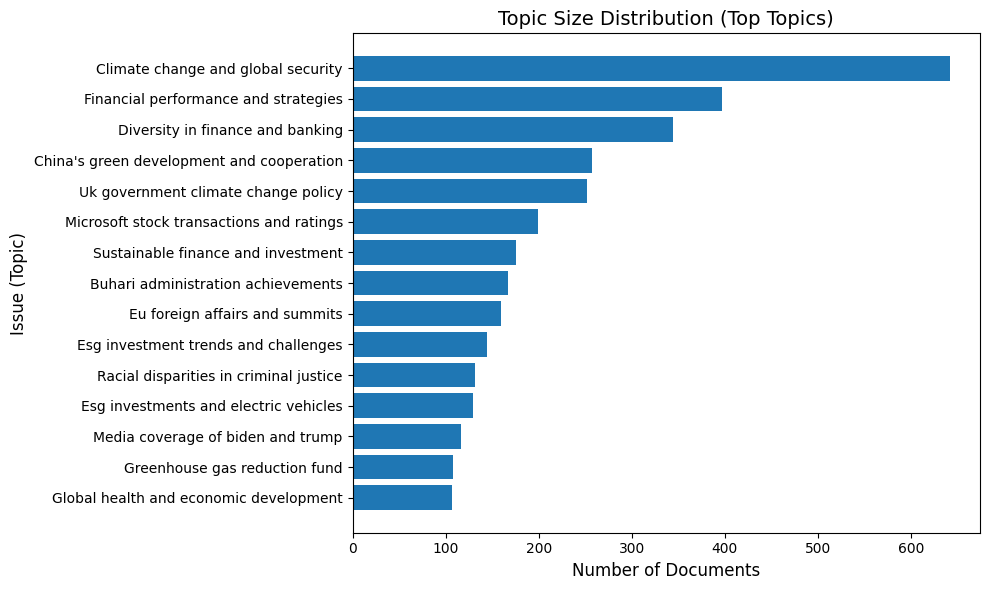

In [60]:
import matplotlib.pyplot as plt

TOP_N = 15  # show only top topics for clarity

def clean_topic_label(raw_name, max_words=3):
    # remove topic id prefix (e.g. "12_")
    name = re.sub(r"^\d+_", "", raw_name)
    words = name.split("_")
    words = [w for w in words if not w.isdigit()]
    words = words[:max_words]
    return " ".join(w.capitalize() for w in words)

df["topic_label"] = df["topic_name"].apply(clean_topic_label)

topic_sizes = (
    df[df["topic"] != -1]
    .groupby("topic_label")
    .size()
    .sort_values(ascending=False)
    .head(TOP_N)
)

plt.figure(figsize=(10, 6))
plt.barh(topic_sizes.index, topic_sizes.values)
plt.gca().invert_yaxis()

plt.title("Topic Size Distribution (Top Topics)", fontsize=14)
plt.xlabel("Number of Documents", fontsize=12)
plt.ylabel("Issue (Topic)", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig("topic_size_distribution.png")
plt.show()

## Actor–Issue Association Heatmap (Top Actors × Top Topics)

This cell builds a heatmap that shows **which actors are most associated with which topics** (issues), using simple co-occurrence counts.

**What we plot**
- Rows = **Top actors** (by overall visibility / mentions)
- Columns = **Top topics** (by number of documents)
- Cell value = how many times that actor appears in documents belonging to that topic (`count`)

**Steps**
1) Select the **Top N actors** from `actor_centrality`.
2) Select the **Top N topics** by document frequency (excluding noise topic `-1`).
3) Ensure `actor_issue` contains topic names/labels by mapping:
   - `topic → topic_name` using `topic_name_map`
   - `topic_name → topic_label` using `clean_topic_label`
4) Filter to the selected actors/topics and pivot into a matrix.
5) Plot the matrix as a heatmap for easy comparison.

**How to read it**
- Darker cells = stronger actor–topic association (more co-occurrences).
- Row patterns reveal each actor’s “issue profile”.
- Column patterns reveal which actors dominate a specific topic.

**Output**
- Heatmap figure saved as `actor_issue_heatmap.png`.


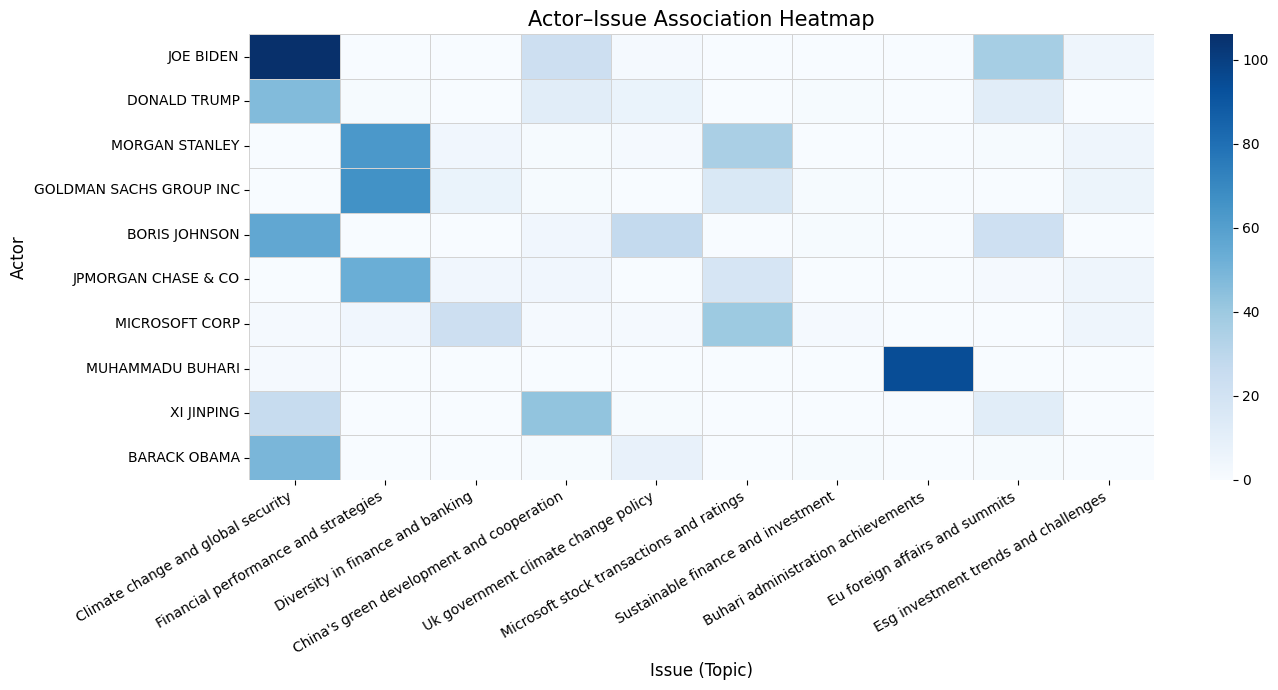

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

TOP_ACTORS = 10
TOP_TOPICS = 10

# ---- Select top actors (by centrality) ----
top_actor_names = (
    actor_centrality
    .head(TOP_ACTORS)["actor"]
    .tolist()
)

# ---- Select top topics (by document frequency) ----
top_topic_labels = (
    df[df["topic"] != -1]
    .groupby("topic_label")   # use clean labels
    .size()
    .sort_values(ascending=False)
    .head(TOP_TOPICS)
    .index.tolist() # Convert to list for consistent indexing
)

# ---- Filter actor–issue table ----
# Ensure actor_issue has the 'topic_name' column. It seems the original error happened because 'topic_name' was expected in actor_issue
# but was not explicitly added after the initial actor_issue creation. Re-mapping here to ensure it exists.
# Also add 'topic_label' to actor_issue for filtering and pivoting.
actor_issue['topic_name'] = actor_issue['topic'].map(topic_name_map)
actor_issue['topic_label'] = actor_issue['topic_name'].apply(clean_topic_label)

heatmap_df = actor_issue[
    (actor_issue["actor"].isin(top_actor_names)) &
    (actor_issue["topic_label"].isin(top_topic_labels))
]

# ---- Pivot for heatmap ----
heatmap_pivot = heatmap_df.pivot_table(
    index="actor",
    columns="topic_label",
    values="count",
    fill_value=0
)

# ---- Reindex to ensure all top actors and topics are present ----
# Fill any missing actor-topic combinations with 0
heatmap_pivot = heatmap_pivot.reindex(index=top_actor_names, columns=top_topic_labels, fill_value=0)

# ---- Plot ----
plt.figure(figsize=(14, 7))
sns.heatmap(
    heatmap_pivot,
    cmap="Blues",
    linewidths=0.5,
    linecolor="lightgrey"
)

plt.title("Actor–Issue Association Heatmap", fontsize=15)
plt.xlabel("Issue (Topic)", fontsize=12)
plt.ylabel("Actor", fontsize=12)

plt.xticks(rotation=30, ha="right", fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig("actor_issue_heatmap.png")
plt.show()

## Actor–Issue Network Graph

This cell builds a **bipartite network** between actors and topics.

- Nodes = actors + topics  
- Edges = actor–topic co-occurrence  
- Edge weight = number of mentions within that topic  

We use a spring layout for visual separation and plot the network to show:
- which actors connect to multiple issues,
- which topics are dominated by specific actors.

**Output:** Network visualization saved as `actor_issue_network_improved.png`.


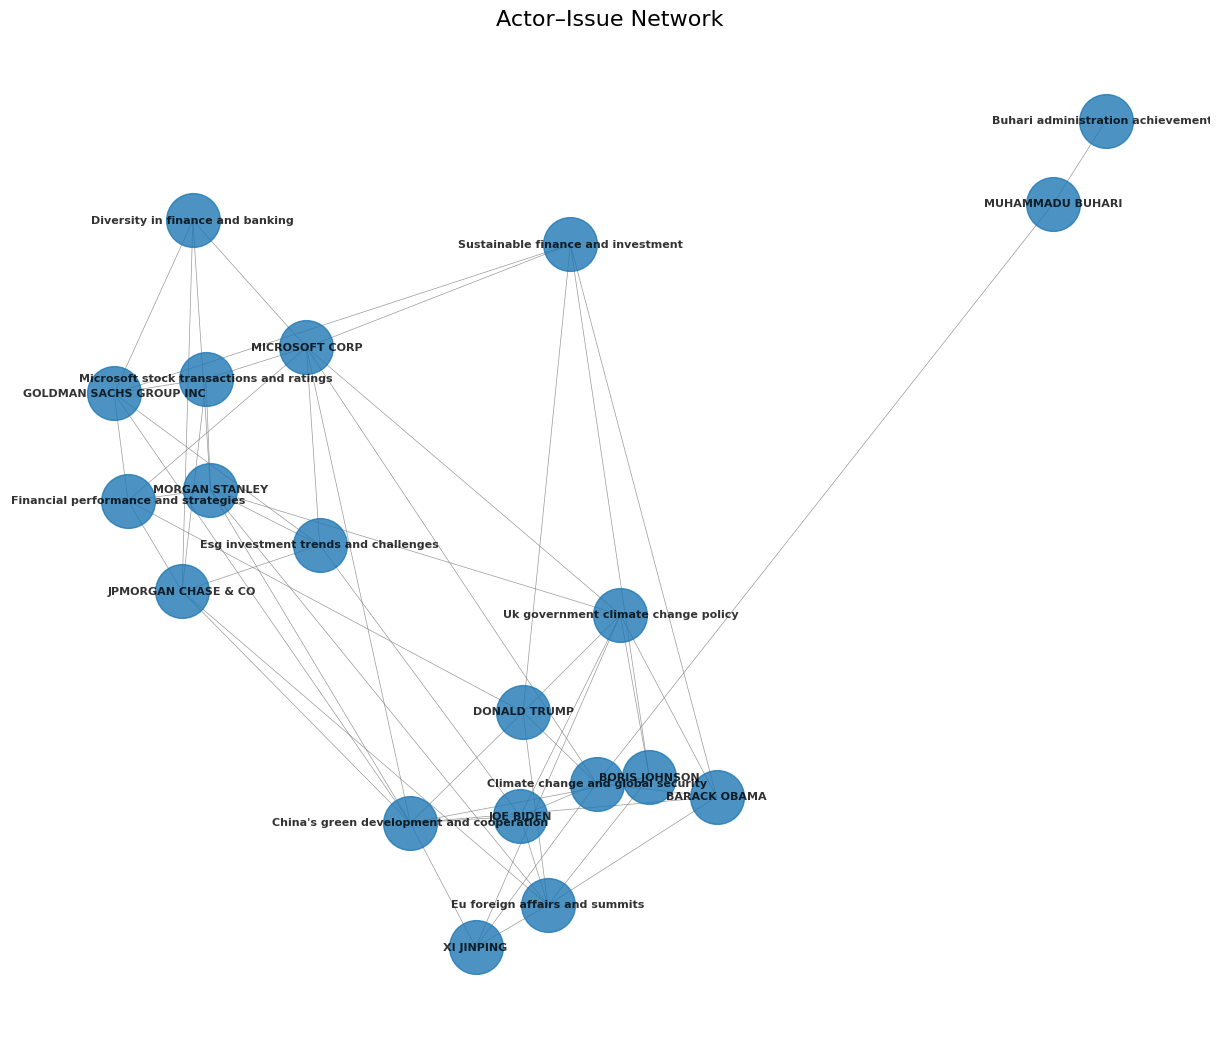

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for actor in top_actor_names:
    G.add_node(actor, type="actor")

for topic in top_topic_labels: # Changed 'top_topic_names' to 'top_topic_labels'
    G.add_node(topic, type="topic")

for _, row in heatmap_df.iterrows():
    # Use 'topic_label' from heatmap_df as it's already cleaned and used for filtering
    G.add_edge(row["actor"], row["topic_label"], weight=row["count"])

plt.figure(figsize=(12, 10)) # Increased figure size for better layout
pos = nx.spring_layout(G, k=0.7, seed=42) # Adjusted k for better spacing

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=1500, # Increased node size significantly
    font_size=8,   # Increased font size for labels
    font_weight='bold',
    alpha=0.8,
    width=0.5,
    edge_color='gray'
)

plt.title("Actor–Issue Network", fontsize=16)
plt.tight_layout()
plt.savefig("actor_issue_network_improved.png")
plt.show()

## Actor Centrality (Top Actors)

This plot shows the **most frequently mentioned actors** in the corpus.

- X-axis: number of mentions (visibility)
- Y-axis: actor names
- Top N actors selected from `actor_centrality`

Higher bars indicate actors with greater presence in the discourse, serving as a simple measure of **actor centrality/visibility**.


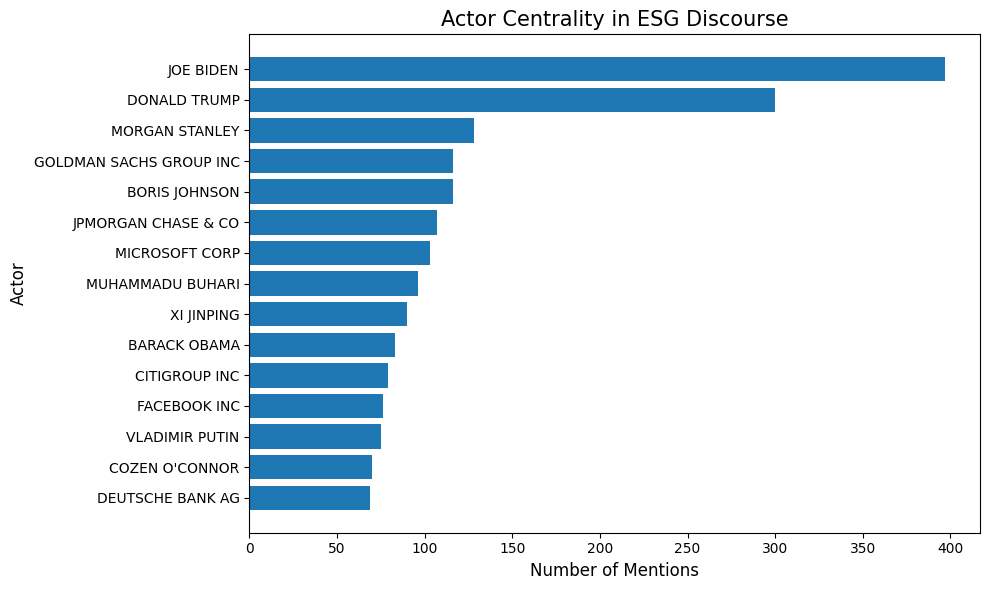

In [63]:
import matplotlib.pyplot as plt

TOP_N = 15

top_central_actors = actor_centrality.head(TOP_N)

plt.figure(figsize=(10, 6))
plt.barh(
    top_central_actors["actor"],
    top_central_actors["mentions"]
)
plt.gca().invert_yaxis()

plt.title("Actor Centrality in ESG Discourse", fontsize=15)
plt.xlabel("Number of Mentions", fontsize=12)
plt.ylabel("Actor", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## Top Actor–Issue Associations

This chart visualizes the **strongest actor–topic co-occurrences** in the dataset.

- Each bar represents one **Actor – Issue pair**.
- X-axis: number of times the actor appears in documents of that topic.
- Y-axis: combined label (`Actor – Topic`).

This highlights the most dominant actor–issue relationships and helps identify which actors are strongly linked to specific themes.

**Output:** Figure saved as `top_actor_issue_bar_chart.png`.


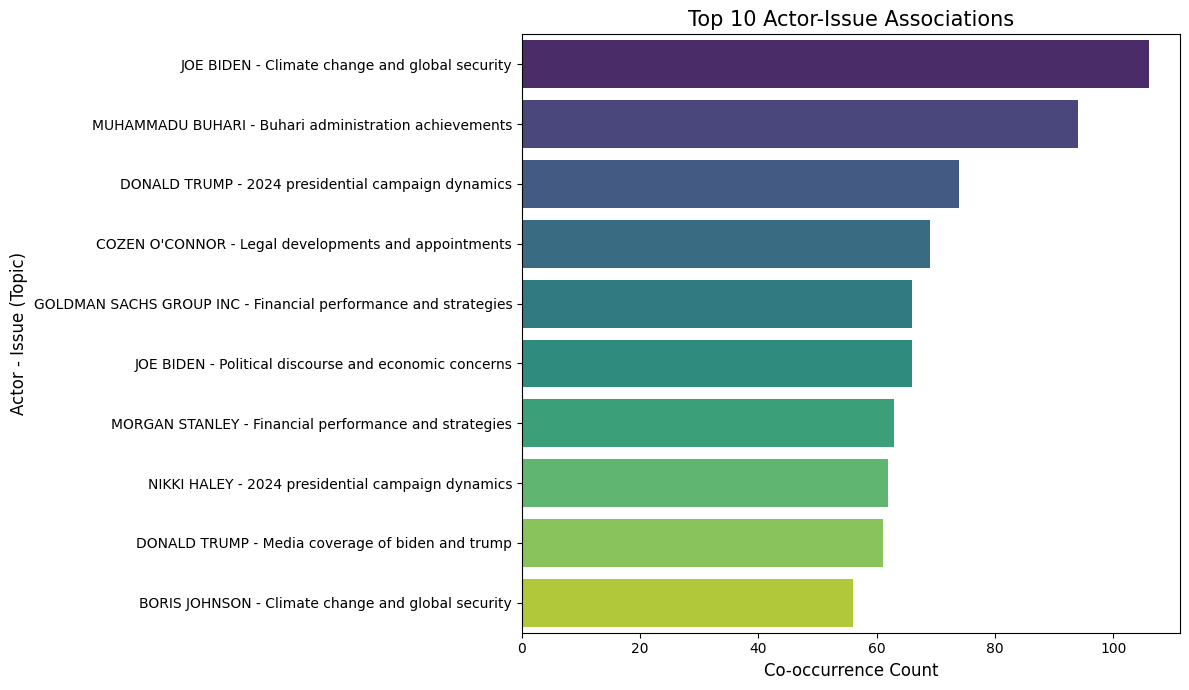

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

TOP_N_ASSOCIATIONS = 10

# Select the top N actor-issue associations
plot_data = top_actors_per_topic.head(TOP_N_ASSOCIATIONS).copy()

# Create the 'topic_label' column in plot_data
plot_data["topic_label"] = plot_data["topic_name"].apply(clean_topic_label)

# Create a combined label for actor and topic for better readability
plot_data["actor_issue_label"] = plot_data["actor"] + " - " + plot_data["topic_label"]

plt.figure(figsize=(12, 7))
sns.barplot(
    x="count",
    y="actor_issue_label",
    data=plot_data,
    palette="viridis"
)

plt.title("Top 10 Actor-Issue Associations", fontsize=15)
plt.xlabel("Co-occurrence Count", fontsize=12)
plt.ylabel("Actor - Issue (Topic)", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig("top_actor_issue_bar_chart.png")
plt.show()